# Credit Scoring

# 

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Librerias

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os

In [3]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_columns', 200)

In [4]:
%config InlineBackend.figure_format = 'retina'

### Lectura de Datos

In [5]:
path = '../data/Fraud/fraudTrain.csv'
df = pd.read_csv( path )
df.shape

(1296675, 23)

In [6]:
df.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
119448,119448,2019-03-08 17:38:51,2254917871818484,"fraud_Konopelski, Schneider and Hartmann",food_dining,117.7400,Margaret,Gibson,F,382 Williams Stream Suite 197,Scotland,MD,20687,38.0828,-76.3477,313,Insurance underwriter,1976-03-26,ce56dedd9f40b9121349595640b40f11,1331228331,37.9126,-76.9459,0
119428,119428,2019-03-08 17:24:29,3565414434959494,"fraud_Prosacco, Kreiger and Kovacek",home,149.1500,Ryan,Arnold,M,2056 Michael Wells Apt. 348,Prairie Creek,IN,47869,39.4336,-87.4101,137,Materials engineer,1967-03-12,cc7545828a529a7cc21c828875630ac5,1331227469,39.7950,-86.6628,0
1012931,1012931,2020-02-22 01:49:36,375623337201129,"fraud_Olson, Becker and Koch",gas_transport,8.4700,Karen,Brewer,F,87896 Lisa Burgs,Isanti,MN,55040,45.4682,-93.2266,12568,Theatre director,1958-03-18,bd2382628ef4c5537d43327f3cc5f192,1361497776,46.4328,-93.0945,1
858944,858944,2019-12-16 22:34:36,6011148190095209,fraud_Reichel LLC,personal_care,96.4700,Terri,Bailey,F,508 Erin Mount,Daly City,CA,94015,37.6787,-122.4780,107941,"Buyer, industrial",1991-10-04,34d123ef7a46a69cf98fae4ac863d33b,1355697276,37.7740,-122.6442,0
236471,236471,2019-04-28 22:44:24,38797410705641,fraud_Kris-Kertzmann,travel,544.7500,Andrew,Tucker,M,583 Gray Creek,Oak Hill,NY,12460,42.4069,-74.1528,277,Glass blower/designer,1971-12-12,f65a0866f4b9d95e747fa693de1f67a0,1335653064,41.6907,-75.0506,0


__Diccionario de datos__

* index - Unique Identifier for each row
* transdatetrans_time - Transaction DateTime
* cc_num - Credit Card Number of Customer
* merchant - Merchant Name
* category - Category of Merchant
* amt - Amount of Transaction
* first - First Name of Credit Card Holder
* last - Last Name of Credit Card Holder
* gender - Gender of Credit Card Holder
* street - Street Address of Credit Card Holder
* city - City of Credit Card Holder
* state - State of Credit Card Holder
* zip - Zip of Credit Card Holder
* lat - Latitude Location of Credit Card Holder
* long - Longitude Location of Credit Card Holder
* city_pop - Credit Card Holder's City Population
* job - Job of Credit Card Holder
* dob - Date of Birth of Credit Card Holder
* trans_num - Transaction Number
* unix_time - UNIX Time of transaction
* merch_lat - Latitude Location of Merchant
* merch_long - Longitude Location of Merchant
* is_fraud - Fraud Flag <--- Target Class

### Problema / Resumen

* Construir el TAD para resolver la problematica de saber si una transacción es o no fraude. Utilizando el modelo supervisado de clasificación.

### Exploarción / Inspección / Limpieza __(EDA)__

In [7]:
df['is_fraud'].value_counts(), df['is_fraud'].value_counts(1)*100

(is_fraud
 0    1289169
 1       7506
 Name: count, dtype: int64,
 is_fraud
 0   99.4211
 1    0.5789
 Name: proportion, dtype: float64)

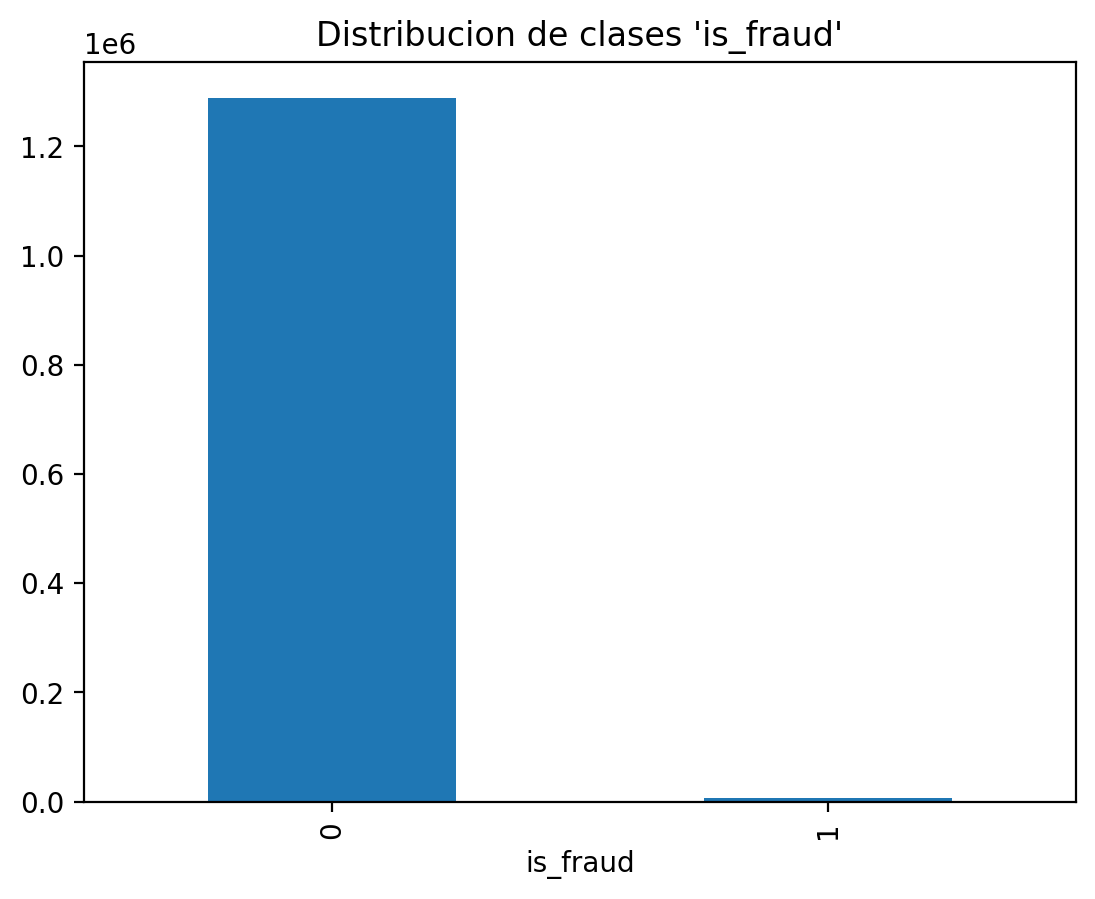

In [8]:
df['is_fraud'].value_counts().plot(kind="bar", title="Distribucion de clases 'is_fraud'")
plt.show()

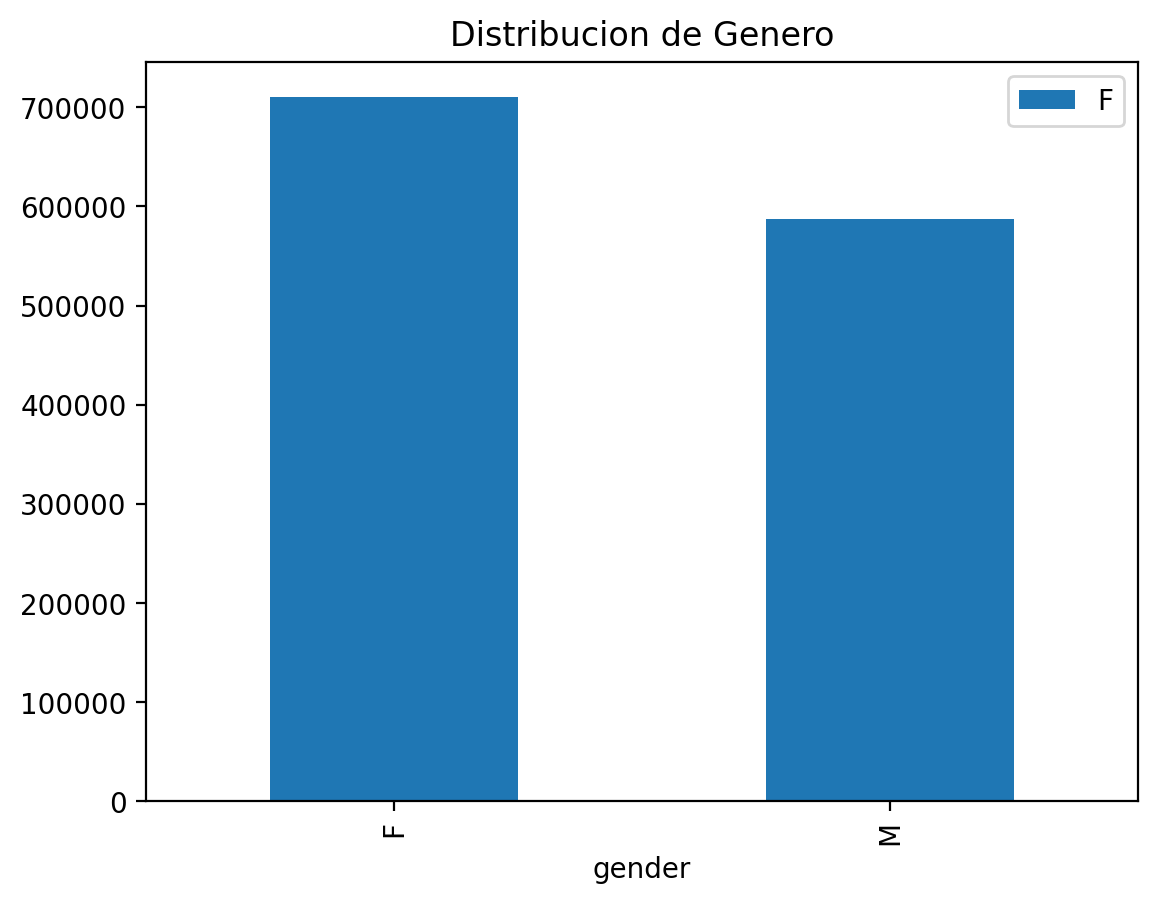

In [9]:
df['gender'].value_counts().plot(kind='bar', title="Distribucion de Genero")
plt.legend(df['gender'].unique().tolist())
plt.show()

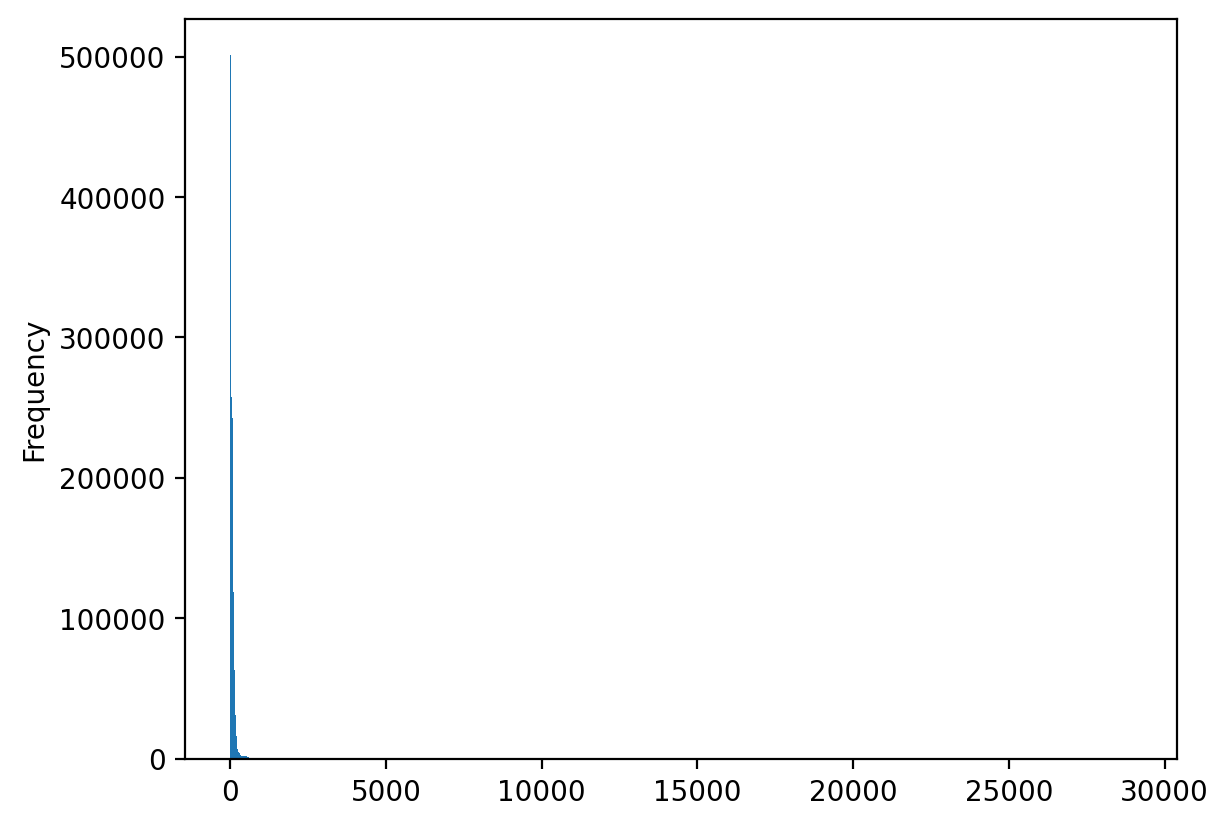

In [10]:
df['amt'].plot(kind="hist", bins=1000)
plt.show()

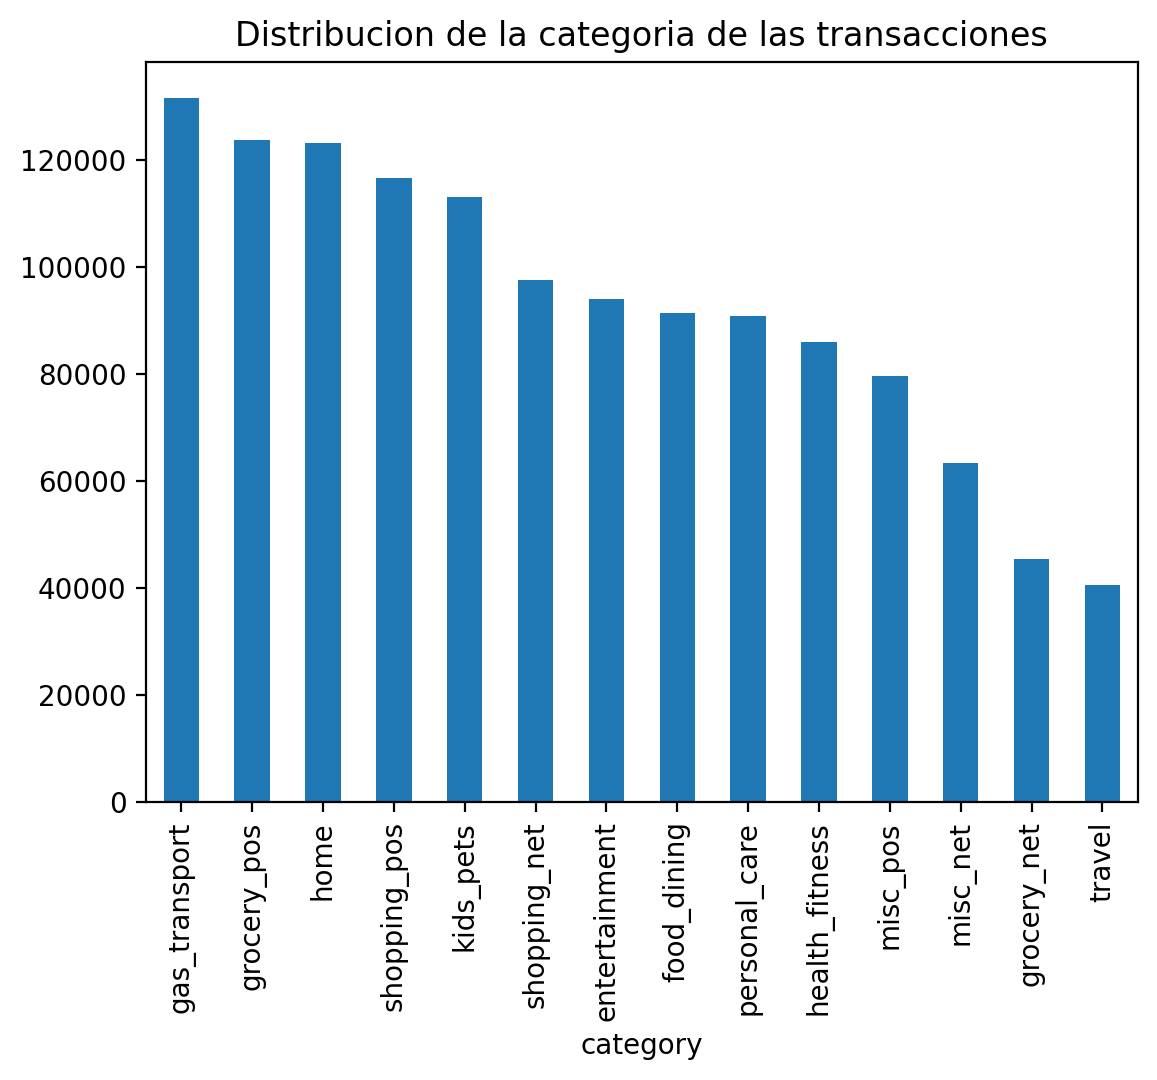

In [11]:
df['category'].value_counts().plot(kind='bar', title="Distribucion de la categoria de las transacciones")
plt.show()

In [12]:
df.dtypes # Tipo de datos del dataset

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [13]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000
mean,648337.0000,417192042079726656.0000,70.3510,48800.6711,38.5376,-90.2263,88824.4406,1349243636.7261,38.5373,-90.2265,0.0058
std,374317.9745,1308806447000240384.0000,160.3160,26893.2225,5.0758,13.7591,301956.3607,12841278.4234,5.1098,13.7711,0.0759
min,0.0000,60416207185.0000,1.0000,1257.0000,20.0271,-165.6723,23.0000,1325376018.0000,19.0278,-166.6712,0.0000
25%,324168.5000,180042946491150.0000,9.6500,26237.0000,34.6205,-96.7980,743.0000,1338750742.5000,34.7336,-96.8973,0.0000
50%,648337.0000,3521417320836166.0000,47.5200,48174.0000,39.3543,-87.4769,2456.0000,1349249747.0000,39.3657,-87.4384,0.0000
75%,972505.5000,4642255475285942.0000,83.1400,72042.0000,41.9404,-80.1580,20328.0000,1359385375.5000,41.9572,-80.2368,0.0000
max,1296674.0000,4992346398065154048.0000,28948.9000,99783.0000,66.6933,-67.9503,2906700.0000,1371816817.0000,67.5103,-66.9509,1.0000


In [14]:
df.describe(percentiles=np.arange(0, 1.01, 0.1))

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000
mean,648337.0000,417192042079726656.0000,70.3510,48800.6711,38.5376,-90.2263,88824.4406,1349243636.7261,38.5373,-90.2265,0.0058
std,374317.9745,1308806447000240384.0000,160.3160,26893.2225,5.0758,13.7591,301956.3607,12841278.4234,5.1098,13.7711,0.0759
min,0.0000,60416207185.0000,1.0000,1257.0000,20.0271,-165.6723,23.0000,1325376018.0000,19.0278,-166.6712,0.0000
0%,0.0000,60416207185.0000,1.0000,1257.0000,20.0271,-165.6723,23.0000,1325376018.0000,19.0278,-166.6712,0.0000
10%,129667.4000,4464457352619.0000,4.1100,13304.0000,31.7706,-111.0985,260.0000,1331555450.6000,31.6385,-111.2451,0.0000
20%,259334.8000,30427035050508.0000,7.7500,21102.0000,33.9056,-98.7388,566.0000,1336556658.8000,33.8206,-98.8402,0.0000
30%,389002.2000,213175487106448.0000,15.7400,29939.0000,35.9335,-95.2739,964.0000,1340797167.8000,35.8173,-95.1689,0.0000
40%,518669.6000,377654590313960.0000,32.1300,38761.0000,38.2352,-91.0286,1631.0000,1344732593.2000,38.0559,-91.0928,0.0000
50%,648337.0000,3521417320836166.0000,47.5200,48174.0000,39.3543,-87.4769,2456.0000,1349249747.0000,39.3657,-87.4384,0.0000


In [15]:
df['Unnamed: 0'].value_counts() # Columna extra, solo tiene 1's, significa que es el indice

Unnamed: 0
0          1
864447     1
864454     1
864453     1
864452     1
          ..
432224     1
432223     1
432222     1
432221     1
1296674    1
Name: count, Length: 1296675, dtype: int64

In [16]:
df.rename(columns={'Unnamed: 0':'index'},inplace=True)

In [17]:
# Convertimos a tipo de datos datetime, formato de np
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [18]:
# Columna ZIP, codifo postal, es un valor de 6 digitos, rellenamos con ceros a la izquierda
df['zip'] = df['zip'].map( lambda z: str(z) if len(str(z)) == 5 else '0'+str(z) )

In [19]:
# Actualizacion del tipo de dato
df['cc_num'] = df['cc_num'].astype(str)

In [20]:
# Analizamos la distribucion de los datos con los percentiles
df['amt'].describe(percentiles=[.95, .96, .97, .98, .99])

count   1296675.0000
mean         70.3510
std         160.3160
min           1.0000
50%          47.5200
95%         196.3100
96%         214.4600
97%         248.0678
98%         337.9800
99%         545.9926
max       28948.9000
Name: amt, dtype: float64

In [21]:
df[df['amt'] > 20000]

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
352894,352894,2019-06-14 20:15:38,5540636818935089,fraud_Hackett Group,travel,25086.9400,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,01843,42.6911,-71.1605,76383,Geoscientist,1985-04-04,0b902a1e549c98b949444a7557da2403,1339704938,42.3972,-71.4742,0
606211,606211,2019-09-14 22:19:01,30408301059761,fraud_Boyer-Haley,travel,26544.1200,Brandon,Pittman,M,2881 Frey Village,Cross,SC,29436,33.3364,-80.1859,4471,Occupational hygienist,1973-10-09,dda9d800d37a9fc2c086a836d66b0588,1347661141,33.0203,-80.1256,0
787549,787549,2019-12-01 16:19:23,4979422371139333,fraud_Satterfield-Lowe,travel,28948.9000,Kelly,Zimmerman,F,1893 Katie Tunnel,Westerville,NE,68881,41.4193,-99.3844,73,Product designer,1935-02-10,309c4bf7fc47b1ddee5ad883bcf634b6,1354378763,42.3173,-99.1395,0
793677,793677,2019-12-02 15:53:46,675909898057,"fraud_Monahan, Hermann and Johns",travel,27390.1200,Christopher,Henry,M,1198 Robert Stravenue Apt. 479,Armonk,NY,10504,41.1360,-73.7009,7987,Television/film/video producer,1964-03-16,2ca9bd5df126cc35e541a4f2c2551197,1354463626,41.6659,-74.6630,0
1234797,1234797,2020-05-30 17:31:30,60423098130,"fraud_Monahan, Hermann and Johns",travel,27119.7700,Jason,Gray,M,875 Amy Point,Amorita,OK,73719,36.9412,-98.2458,83,Barrister's clerk,1958-07-28,916093eeab1831be71d49362bf5b7be5,1369935090,37.2869,-97.2496,0


In [22]:
df['trans_date_trans_time'].min() , df['trans_date_trans_time'].max()

(Timestamp('2019-01-01 00:00:18'), Timestamp('2020-06-21 12:13:37'))

### Ingeniería de Variables

> _Las ventanas de tiempo estan relacionadas con definicion de la unidad muestral, para este dataset la unidad muestral es __transacción__, ya que quiero saber si la transacción es fraude o no. A nivel __tarjeta__ se debe acomodar el dataset a la unidad muestral tarjeta, donde tendriamos el historico de las transacciones, maximo, min, no. transacciones, etc. el historico_

In [23]:
df.columns

Index(['index', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [24]:
df.head()

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0


In [25]:
df['hour_str'] = df['trans_date_trans_time'].map( lambda x: x.strftime('%H') )
df['week_day'] = df['trans_date_trans_time'].map( lambda x: x.weekday() )

df['day'] = df['trans_date_trans_time'].map( lambda x: x.day )
df['month'] = df['trans_date_trans_time'].map( lambda x: x.month )
df['year'] = df['trans_date_trans_time'].map( lambda x: x.year )

In [26]:
df[['trans_date_trans_time', 'hour_str', 'week_day', 'day', 'month', 'year']].head()

,trans_date_trans_time,hour_str,week_day,day,month,year
0,2019-01-01 00:00:18,00,1,1,1,2019
1,2019-01-01 00:00:44,00,1,1,1,2019
2,2019-01-01 00:00:51,00,1,1,1,2019
3,2019-01-01 00:01:16,00,1,1,1,2019
4,2019-01-01 00:03:06,00,1,1,1,2019


In [27]:
df['week_day_2'] = df['week_day'].map( dict( zip( range( 0, 7, 1 ), 'LMXJVSD' ) ) )
df['age'] = ((df['trans_date_trans_time'] - df['dob']) / np.timedelta64(364,'D')).astype(int)

In [28]:
# Franjas horarias
def franjas_hrs(hr):
    
    if hr < 6:
        r = 'madrugada'
    elif hr < 12:
        r = 'mañana'
    elif hr < 18:
        r = 'tarde'
    elif hr < 24:
        r = 'noche'
    else:
        r = 'error'

    return r


In [29]:
df['franja_hr'] = df['hour_str'].apply( lambda hr: franjas_hrs( int( hr ) ) )
df['count'] = df[ ['cc_num', 'trans_date_trans_time'] ].sort_values( ['cc_num', 'trans_date_trans_time'] ).groupby(['cc_num']).cumcount()

In [30]:
df.head()

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour_str,week_day,day,month,year,week_day_2,age,franja_hr,count
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0,00,1,1,1,2019,M,30,madrugada,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,00,1,1,1,2019,M,40,madrugada,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0,00,1,1,1,2019,M,57,madrugada,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0,00,1,1,1,2019,M,52,madrugada,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0,00,1,1,1,2019,M,32,madrugada,0


### Variables / Definiciones

In [31]:
# Unidas Muestral
um = ['index']

# Target
target = ['is_fraud']

# Variables discretas / Categoricas
vard = ['cc_num','merchant','category','first','last','gender','street','city','state','zip','job',
        'trans_num','hour_str', 'day', 'week_day_2', 'franja_hr' ]

# Continuas / Numéricas
varc = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat','merch_long', 'week_day', 'age', 'count' ]

# Fechas
varfh = ['trans_date_trans_time','dob']

# Variables Fuera
var_fuera = []


In [32]:
# Convertir a numeros
for col in varc:
    df[col] = pd.to_numeric( df[col], errors='coerce' )

# Convertir a string
for col in vard:
    df[col] = df[col].astype(str)

## Analisis exploratorio

### Discreto / Categorico

#### Frecuencias

In [33]:
vard

['cc_num',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'job',
 'trans_num',
 'hour_str',
 'day',
 'week_day_2',
 'franja_hr']

In [34]:
def freq( df, var ):
    if type(var) != list:
        var = [var]
    else:
        for v in var:
            aux = df[v].value_counts().to_frame().rename(columns={'count':'FA'})
            aux['FR'] = aux['FA'] / aux['FA'].sum()
            aux[['FAA', 'FRA']] = aux.apply( np.cumsum )
            print(f"La variable: {v}")
            display(aux)
            print("\n")

freq( df, vard )

La variable: cc_num


,FA,FR,FAA,FRA
cc_num,,,,
571365235126,3123,0.0024,3123,0.0024
4512828414983801773,3123,0.0024,6246,0.0048
36722699017270,3119,0.0024,9365,0.0072
213112402583773,3117,0.0024,12482,0.0096
3545109339866548,3113,0.0024,15595,0.0120
...,...,...,...,...
180097223252063,7,0.0000,1296647,1.0000
4225628813173670,7,0.0000,1296654,1.0000
501894933032,7,0.0000,1296661,1.0000




La variable: merchant


,FA,FR,FAA,FRA
merchant,,,,
fraud_Kilback LLC,4403,0.0034,4403,0.0034
fraud_Cormier LLC,3649,0.0028,8052,0.0062
fraud_Schumm PLC,3634,0.0028,11686,0.0090
fraud_Kuhn LLC,3510,0.0027,15196,0.0117
fraud_Boyer PLC,3493,0.0027,18689,0.0144
...,...,...,...,...
"fraud_Douglas, DuBuque and McKenzie",775,0.0006,1293661,0.9977
fraud_Treutel-King,775,0.0006,1294436,0.9983
"fraud_Medhurst, Labadie and Gottlieb",759,0.0006,1295195,0.9989




La variable: category


,FA,FR,FAA,FRA
category,,,,
gas_transport,131659,0.1015,131659,0.1015
grocery_pos,123638,0.0954,255297,0.1969
home,123115,0.0949,378412,0.2918
shopping_pos,116672,0.0900,495084,0.3818
kids_pets,113035,0.0872,608119,0.4690
shopping_net,97543,0.0752,705662,0.5442
entertainment,94014,0.0725,799676,0.6167
food_dining,91461,0.0705,891137,0.6872
personal_care,90758,0.0700,981895,0.7572




La variable: first


,FA,FR,FAA,FRA
first,,,,
Christopher,26669,0.0206,26669,0.0206
Robert,21667,0.0167,48336,0.0373
Jessica,20581,0.0159,68917,0.0531
James,20039,0.0155,88956,0.0686
Michael,20009,0.0154,108965,0.0840
...,...,...,...,...
Cameron,9,0.0000,1296645,1.0000
Phyllis,8,0.0000,1296653,1.0000
Molly,8,0.0000,1296661,1.0000




La variable: last


,FA,FR,FAA,FRA
last,,,,
Smith,28794,0.0222,28794,0.0222
Williams,23605,0.0182,52399,0.0404
Davis,21910,0.0169,74309,0.0573
Johnson,20034,0.0155,94343,0.0728
Rodriguez,17394,0.0134,111737,0.0862
...,...,...,...,...
Wells,9,0.0000,1296644,1.0000
Peterson,9,0.0000,1296653,1.0000
Strong,8,0.0000,1296661,1.0000




La variable: gender


,FA,FR,FAA,FRA
gender,,,,
F,709863,0.5474,709863,0.5474
M,586812,0.4526,1296675,1.0000




La variable: street


,FA,FR,FAA,FRA
street,,,,
0069 Robin Brooks Apt. 695,3123,0.0024,3123,0.0024
864 Reynolds Plains,3123,0.0024,6246,0.0048
8172 Robertson Parkways Suite 072,3119,0.0024,9365,0.0072
4664 Sanchez Common Suite 930,3117,0.0024,12482,0.0096
8030 Beck Motorway,3113,0.0024,15595,0.0120
...,...,...,...,...
7281 Joshua Mills Apt. 077,7,0.0000,1296647,1.0000
3307 Ferguson Way,7,0.0000,1296654,1.0000
9599 Washington Field Suite 238,7,0.0000,1296661,1.0000




La variable: city


,FA,FR,FAA,FRA
city,,,,
Birmingham,5617,0.0043,5617,0.0043
San Antonio,5130,0.0040,10747,0.0083
Utica,5105,0.0039,15852,0.0122
Phoenix,5075,0.0039,20927,0.0161
Meridian,5060,0.0039,25987,0.0200
...,...,...,...,...
Vacaville,7,0.0000,1296647,1.0000
Claypool,7,0.0000,1296654,1.0000
Karns City,7,0.0000,1296661,1.0000




La variable: state


,FA,FR,FAA,FRA
state,,,,
TX,94876,0.0732,94876,0.0732
NY,83501,0.0644,178377,0.1376
PA,79847,0.0616,258224,0.1991
CA,56360,0.0435,314584,0.2426
OH,46480,0.0358,361064,0.2785
MI,46154,0.0356,407218,0.3140
IL,43252,0.0334,450470,0.3474
FL,42671,0.0329,493141,0.3803
AL,40989,0.0316,534130,0.4119




La variable: zip


,FA,FR,FAA,FRA
zip,,,,
73754,3646,0.0028,3646,0.0028
34112,3613,0.0028,7259,0.0056
48088,3597,0.0028,10856,0.0084
82514,3527,0.0027,14383,0.0111
49628,3123,0.0024,17506,0.0135
...,...,...,...,...
46510,7,0.0000,1296647,1.0000
16041,7,0.0000,1296654,1.0000
38915,7,0.0000,1296661,1.0000




La variable: job


,FA,FR,FAA,FRA
job,,,,
Film/video editor,9779,0.0075,9779,0.0075
Exhibition designer,9199,0.0071,18978,0.0146
Naval architect,8684,0.0067,27662,0.0213
"Surveyor, land/geomatics",8680,0.0067,36342,0.0280
Materials engineer,8270,0.0064,44612,0.0344
...,...,...,...,...
Information officer,8,0.0000,1296646,1.0000
Veterinary surgeon,8,0.0000,1296654,1.0000
Ship broker,7,0.0000,1296661,1.0000




La variable: trans_num


,FA,FR,FAA,FRA
trans_num,,,,
0b242abb623afc578575680df30655b9,1,0.0000,1,0.0000
c85864e7e7cf0be6d1b8597977b8afea,1,0.0000,2,0.0000
1a8a2a05638a5503cc6bb8d5735efcc1,1,0.0000,3,0.0000
4556eaf1f7def06eb500325cde4d054e,1,0.0000,4,0.0000
5e915d9f88bd09cee9655a470d9bc0bd,1,0.0000,5,0.0000
...,...,...,...,...
2d1aa5b21a993788ac19b697598ca44c,1,0.0000,1296671,1.0000
b50dd4b47d1ad877874661afba6eb7f6,1,0.0000,1296672,1.0000
5ce4e974bf15b7d9f133c6eedb81ceb1,1,0.0000,1296673,1.0000




La variable: hour_str


,FA,FR,FAA,FRA
hour_str,,,,
23,67104,0.0518,67104,0.0518
22,66982,0.0517,134086,0.1034
18,66051,0.0509,200137,0.1543
16,65726,0.0507,265863,0.2050
21,65533,0.0505,331396,0.2556
19,65508,0.0505,396904,0.3061
17,65450,0.0505,462354,0.3566
15,65391,0.0504,527745,0.4070
13,65314,0.0504,593059,0.4574




La variable: day


,FA,FR,FAA,FRA
day,,,,
1,47089,0.0363,47089,0.0363
15,46213,0.0356,93302,0.0720
8,46201,0.0356,139503,0.1076
16,44894,0.0346,184397,0.1422
2,44748,0.0345,229145,0.1767
9,44685,0.0345,273830,0.2112
7,44239,0.0341,318069,0.2453
14,44015,0.0339,362084,0.2792
28,43470,0.0335,405554,0.3128




La variable: week_day_2


,FA,FR,FAA,FRA
week_day_2,,,,
L,254282,0.1961,254282,0.1961
D,250579,0.1932,504861,0.3894
S,200957,0.1550,705818,0.5443
M,160227,0.1236,866045,0.6679
V,152272,0.1174,1018317,0.7853
J,147285,0.1136,1165602,0.8989
X,131073,0.1011,1296675,1.0000




La variable: franja_hr


,FA,FR,FAA,FRA
franja_hr,,,,
noche,396276,0.3056,396276,0.3056
tarde,392023,0.3023,788299,0.6079
madrugada,254830,0.1965,1043129,0.8045
mañana,253546,0.1955,1296675,1.0000


#### Normalizar

In [35]:
df

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour_str,week_day,day,month,year,week_day_2,age,franja_hr,count
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0,00,1,1,1,2019,M,30,madrugada,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,00,1,1,1,2019,M,40,madrugada,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0,00,1,1,1,2019,M,57,madrugada,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0,00,1,1,1,2019,M,52,madrugada,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0,00,1,1,1,2019,M,32,madrugada,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.5600,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.8413,-111.6908,0,12,6,21,6,2020,D,58,tarde,1512
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.7000,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.9069,-78.2465,0,12,6,21,6,2020,D,40,tarde,530
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.9300,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.6195,-105.1305,0,12,6,21,6,2020,D,52,tarde,2069
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.9000,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.7889,-103.2412,0,12,6,21,6,2020,D,39,tarde,2023


In [36]:
def normalizar( df, v, threshold=0.03 ):

    #display(v)
    # Normalized columns starts with 'n_'

    aux = df[v].value_counts(True).to_frame() # Frequency
    aux[f"n_{v}"] = np.where( aux['proportion'] < threshold, "CAT_PEQUE", aux.index) # Assign label according to value
    #display(aux)

    mode = aux.head()[f"n_{v}"].values[0] # get the mode value
    #display(mode)

    # Replace the value of the label with the mode if the sum of proportion is less than the threshold
    if aux.loc[ aux[f"n_{v}"] == "CAT_PEQUE" ]['proportion'].sum() < threshold:
        aux[f"n_{v}"].replace({'CAT_PEQUE':mode}, inplace=True)
    aux.reset_index(inplace=True)
    #display(aux)

    # Add the values to original DataFrame 
    #display(df.merge( aux, left_on=[v], right_on=[v], how='inner').drop('proportion', axis=1))
    return df.merge( aux, left_on=[v], right_on=[v], how='inner').drop('proportion', axis=1)


for v in vard:
    print(f"Normalizando: {v}")
    df = normalizar(df, v, threshold=0.03)

Normalizando: cc_num
Normalizando: merchant
Normalizando: category
Normalizando: first
Normalizando: last
Normalizando: gender
Normalizando: street
Normalizando: city
Normalizando: state
Normalizando: zip
Normalizando: job
Normalizando: trans_num
Normalizando: hour_str
Normalizando: day
Normalizando: week_day_2
Normalizando: franja_hr


In [37]:
df

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour_str,week_day,day,month,year,week_day_2,age,franja_hr,count,n_cc_num,n_merchant,n_category,n_first,n_last,n_gender,n_street,n_city,n_state,n_zip,n_job,n_trans_num,n_hour_str,n_day,n_week_day_2,n_franja_hr
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0,00,1,1,1,2019,M,30,madrugada,0,CAT_PEQUE,CAT_PEQUE,misc_net,CAT_PEQUE,CAT_PEQUE,F,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,00,1,1,1,2019,M,40,madrugada,0,CAT_PEQUE,CAT_PEQUE,grocery_pos,CAT_PEQUE,CAT_PEQUE,F,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0,00,1,1,1,2019,M,57,madrugada,0,CAT_PEQUE,CAT_PEQUE,entertainment,CAT_PEQUE,CAT_PEQUE,M,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0,00,1,1,1,2019,M,52,madrugada,0,CAT_PEQUE,CAT_PEQUE,gas_transport,CAT_PEQUE,CAT_PEQUE,M,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0,00,1,1,1,2019,M,32,madrugada,0,CAT_PEQUE,CAT_PEQUE,misc_pos,CAT_PEQUE,CAT_PEQUE,M,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.5600,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.8413,-111.6908,0,12,6,21,6,2020,D,58,tarde,1512,CAT_PEQUE,CAT_PEQUE,entertainment,CAT_PEQUE,CAT_PEQUE,M,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,12,21,D,tarde
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.7000,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.9069,-78.2465,0,12,6,21,6,2020,D,40,tarde,530,CAT_PEQUE,CAT_PEQUE,food_dining,CAT_PEQUE,CAT_PEQUE,M,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,12,21,D,tarde
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.9300,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.6195,-105.1305,0,12,6,21,6,2020,D,52,tarde,2069,CAT_PEQUE,CAT_PEQUE,food_dining,CAT_PEQUE,CAT_PEQUE,M,CAT_PEQUE,CAT_PEQ

In [38]:
varn = df.filter( like='n_' ).columns.tolist()
varn

['n_cc_num',
 'n_merchant',
 'n_category',
 'n_first',
 'n_last',
 'n_gender',
 'n_street',
 'n_city',
 'n_state',
 'n_zip',
 'n_job',
 'n_trans_num',
 'n_hour_str',
 'n_day',
 'n_week_day_2',
 'n_franja_hr']

In [39]:
freq( df, varn)

La variable: n_cc_num


,FA,FR,FAA,FRA
n_cc_num,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_merchant


,FA,FR,FAA,FRA
n_merchant,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_category


,FA,FR,FAA,FRA
n_category,,,,
gas_transport,131659,0.1015,131659,0.1015
grocery_pos,123638,0.0954,255297,0.1969
home,123115,0.0949,378412,0.2918
shopping_pos,116672,0.0900,495084,0.3818
kids_pets,113035,0.0872,608119,0.4690
shopping_net,97543,0.0752,705662,0.5442
entertainment,94014,0.0725,799676,0.6167
food_dining,91461,0.0705,891137,0.6872
personal_care,90758,0.0700,981895,0.7572




La variable: n_first


,FA,FR,FAA,FRA
n_first,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_last


,FA,FR,FAA,FRA
n_last,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_gender


,FA,FR,FAA,FRA
n_gender,,,,
F,709863,0.5474,709863,0.5474
M,586812,0.4526,1296675,1.0000




La variable: n_street


,FA,FR,FAA,FRA
n_street,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_city


,FA,FR,FAA,FRA
n_city,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_state


,FA,FR,FAA,FRA
n_state,,,,
CAT_PEQUE,762545,0.5881,762545,0.5881
TX,94876,0.0732,857421,0.6612
NY,83501,0.0644,940922,0.7256
PA,79847,0.0616,1020769,0.7872
CA,56360,0.0435,1077129,0.8307
OH,46480,0.0358,1123609,0.8665
MI,46154,0.0356,1169763,0.9021
IL,43252,0.0334,1213015,0.9355
FL,42671,0.0329,1255686,0.9684




La variable: n_zip


,FA,FR,FAA,FRA
n_zip,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_job


,FA,FR,FAA,FRA
n_job,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_trans_num


,FA,FR,FAA,FRA
n_trans_num,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_hour_str


,FA,FR,FAA,FRA
n_hour_str,,,,
23,67104,0.0518,67104,0.0518
22,66982,0.0517,134086,0.1034
18,66051,0.0509,200137,0.1543
16,65726,0.0507,265863,0.2050
21,65533,0.0505,331396,0.2556
19,65508,0.0505,396904,0.3061
17,65450,0.0505,462354,0.3566
15,65391,0.0504,527745,0.4070
13,65314,0.0504,593059,0.4574




La variable: n_day


,FA,FR,FAA,FRA
n_day,,,,
1,71790,0.0554,71790,0.0554
15,46213,0.0356,118003,0.0910
8,46201,0.0356,164204,0.1266
16,44894,0.0346,209098,0.1613
2,44748,0.0345,253846,0.1958
9,44685,0.0345,298531,0.2302
7,44239,0.0341,342770,0.2643
14,44015,0.0339,386785,0.2983
28,43470,0.0335,430255,0.3318




La variable: n_week_day_2


,FA,FR,FAA,FRA
n_week_day_2,,,,
L,254282,0.1961,254282,0.1961
D,250579,0.1932,504861,0.3894
S,200957,0.1550,705818,0.5443
M,160227,0.1236,866045,0.6679
V,152272,0.1174,1018317,0.7853
J,147285,0.1136,1165602,0.8989
X,131073,0.1011,1296675,1.0000




La variable: n_franja_hr


,FA,FR,FAA,FRA
n_franja_hr,,,,
noche,396276,0.3056,396276,0.3056
tarde,392023,0.3023,788299,0.6079
madrugada,254830,0.1965,1043129,0.8045
mañana,253546,0.1955,1296675,1.0000


#### Unarias

In [40]:
[df[v].unique().shape[0] for v in varn]

[1, 1, 14, 1, 1, 2, 1, 1, 10, 1, 1, 1, 24, 30, 7, 4]

In [41]:
list(zip( varn, [df[v].unique().shape[0] for v in varn] ))

[('n_cc_num', 1),
 ('n_merchant', 1),
 ('n_category', 14),
 ('n_first', 1),
 ('n_last', 1),
 ('n_gender', 2),
 ('n_street', 1),
 ('n_city', 1),
 ('n_state', 10),
 ('n_zip', 1),
 ('n_job', 1),
 ('n_trans_num', 1),
 ('n_hour_str', 24),
 ('n_day', 30),
 ('n_week_day_2', 7),
 ('n_franja_hr', 4)]

In [42]:
[ v for v, conteo, in   zip( varn , [ df[v].unique().shape[0] for v in varn ]) if conteo == 1 ]

['n_cc_num',
 'n_merchant',
 'n_first',
 'n_last',
 'n_street',
 'n_city',
 'n_zip',
 'n_job',
 'n_trans_num']

In [43]:
unarias = [ v for v, conteo, in   zip( varn , [ df[v].unique().shape[0] for v in varn ]) if conteo == 1 ]
unarias

['n_cc_num',
 'n_merchant',
 'n_first',
 'n_last',
 'n_street',
 'n_city',
 'n_zip',
 'n_job',
 'n_trans_num']

In [44]:
df[unarias].head(5)

,n_cc_num,n_merchant,n_first,n_last,n_street,n_city,n_zip,n_job,n_trans_num
0,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE
1,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE
2,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE
3,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE
4,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE


In [45]:
[x for x in varn if x not in unarias]

['n_category',
 'n_gender',
 'n_state',
 'n_hour_str',
 'n_day',
 'n_week_day_2',
 'n_franja_hr']

Solo se consideran las variables que tienen mas de un valor en la columna

In [46]:
varn = [x for x in varn if x not in unarias] # Drop columns with unique values
varn

['n_category',
 'n_gender',
 'n_state',
 'n_hour_str',
 'n_day',
 'n_week_day_2',
 'n_franja_hr']

### Continuas / Numéricas 

#### Discretizar

In [47]:
from sklearn.preprocessing import KBinsDiscretizer

varc

['amt',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'week_day',
 'age',
 'count']

In [48]:
def discretizar(df_aux, v, k):
    """
    Bin continuous data into intervals

    Args:
        df_aux: aux DataFrame.
        v: column of dataset
        k: n_bins

    Returns:
        DataFrame plus the column 'v' data into intervals.
    """

    kb = KBinsDiscretizer(
        n_bins=k,
        encode='ordinal',
        strategy='quantile',
        subsample=None
    )

    aux_df = df_aux.copy() # to avoid warnings

    # Sure the data is numeric and not exists rows null or nan
    aux_df[v] = pd.to_numeric( aux_df[v], errors='coerce' )
    aux_df = aux_df.dropna( subset=[v] )

    # Fit the discretizer
    kb.fit( aux_df[[v]] )

    # Get the intervals as strings
    v_bins = kb.bin_edges_[0] # get the limits of the bins

    # Insert into DataFrame column the generated data
    aux_df[f"d_{v}_{k}"] = pd.cut( aux_df[v],
                                  bins=v_bins,
                                  include_lowest=True).astype(str)
    
    return aux_df

In [49]:
df.head()

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour_str,week_day,day,month,year,week_day_2,age,franja_hr,count,n_cc_num,n_merchant,n_category,n_first,n_last,n_gender,n_street,n_city,n_state,n_zip,n_job,n_trans_num,n_hour_str,n_day,n_week_day_2,n_franja_hr
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0,00,1,1,1,2019,M,30,madrugada,0,CAT_PEQUE,CAT_PEQUE,misc_net,CAT_PEQUE,CAT_PEQUE,F,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,00,1,1,1,2019,M,40,madrugada,0,CAT_PEQUE,CAT_PEQUE,grocery_pos,CAT_PEQUE,CAT_PEQUE,F,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0,00,1,1,1,2019,M,57,madrugada,0,CAT_PEQUE,CAT_PEQUE,entertainment,CAT_PEQUE,CAT_PEQUE,M,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0,00,1,1,1,2019,M,52,madrugada,0,CAT_PEQUE,CAT_PEQUE,gas_transport,CAT_PEQUE,CAT_PEQUE,M,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0,00,1,1,1,2019,M,32,madrugada,0,CAT_PEQUE,CAT_PEQUE,misc_pos,CAT_PEQUE,CAT_PEQUE,M,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada


In [50]:
for v in varc:
    
    for k in range( 2, 6 ):
    
        # If k is higher than unique values in the column 'v'
        if df[v].nunique() < k:
            print(f"Saltando {v} con {k} bins porque tiene pocos valores unicos")
            continue
            
        print(f"Para la variable {v} con {k} bins.")

        df = discretizar( df, v, k )

Para la variable amt con 2 bins.
Para la variable amt con 3 bins.
Para la variable amt con 4 bins.
Para la variable amt con 5 bins.
Para la variable lat con 2 bins.
Para la variable lat con 3 bins.
Para la variable lat con 4 bins.
Para la variable lat con 5 bins.
Para la variable long con 2 bins.
Para la variable long con 3 bins.
Para la variable long con 4 bins.
Para la variable long con 5 bins.
Para la variable city_pop con 2 bins.
Para la variable city_pop con 3 bins.
Para la variable city_pop con 4 bins.
Para la variable city_pop con 5 bins.
Para la variable unix_time con 2 bins.
Para la variable unix_time con 3 bins.
Para la variable unix_time con 4 bins.
Para la variable unix_time con 5 bins.
Para la variable merch_lat con 2 bins.
Para la variable merch_lat con 3 bins.
Para la variable merch_lat con 4 bins.
Para la variable merch_lat con 5 bins.
Para la variable merch_long con 2 bins.
Para la variable merch_long con 3 bins.
Para la variable merch_long con 4 bins.
Para la variable

In [51]:
# Save the discretized varables
vari = df.filter( like='d_' ).columns.tolist()
vari

['d_amt_2',
 'd_amt_3',
 'd_amt_4',
 'd_amt_5',
 'd_lat_2',
 'd_lat_3',
 'd_lat_4',
 'd_lat_5',
 'd_long_2',
 'd_long_3',
 'd_long_4',
 'd_long_5',
 'd_city_pop_2',
 'd_city_pop_3',
 'd_city_pop_4',
 'd_city_pop_5',
 'd_unix_time_2',
 'd_unix_time_3',
 'd_unix_time_4',
 'd_unix_time_5',
 'd_merch_lat_2',
 'd_merch_lat_3',
 'd_merch_lat_4',
 'd_merch_lat_5',
 'd_merch_long_2',
 'd_merch_long_3',
 'd_merch_long_4',
 'd_merch_long_5',
 'd_week_day_2',
 'd_week_day_3',
 'd_week_day_4',
 'd_week_day_5',
 'd_age_2',
 'd_age_3',
 'd_age_4',
 'd_age_5',
 'd_count_2',
 'd_count_3',
 'd_count_4',
 'd_count_5']

In [52]:
# Save the DataFrame to avoid less it for the computer memory
df.to_parquet('../data/safe_DataFrames/df_discretized.parquet')

In [53]:
import gc
del df
gc.collect()

55939

In [54]:
df = pd.read_parquet('../data/safe_DataFrames/df_discretized.parquet')

In [55]:
# Save the discretized varables
vari = df.filter( like='d_' ).columns.tolist()
vari

['d_amt_2',
 'd_amt_3',
 'd_amt_4',
 'd_amt_5',
 'd_lat_2',
 'd_lat_3',
 'd_lat_4',
 'd_lat_5',
 'd_long_2',
 'd_long_3',
 'd_long_4',
 'd_long_5',
 'd_city_pop_2',
 'd_city_pop_3',
 'd_city_pop_4',
 'd_city_pop_5',
 'd_unix_time_2',
 'd_unix_time_3',
 'd_unix_time_4',
 'd_unix_time_5',
 'd_merch_lat_2',
 'd_merch_lat_3',
 'd_merch_lat_4',
 'd_merch_lat_5',
 'd_merch_long_2',
 'd_merch_long_3',
 'd_merch_long_4',
 'd_merch_long_5',
 'd_week_day_2',
 'd_week_day_3',
 'd_week_day_4',
 'd_week_day_5',
 'd_age_2',
 'd_age_3',
 'd_age_4',
 'd_age_5',
 'd_count_2',
 'd_count_3',
 'd_count_4',
 'd_count_5']

In [56]:
# validate the proporcion of the bins
for v in vari:
    print(f"La variable: {v}")
    display(df[v].value_counts(True))
    print("\n")

La variable: d_amt_2


d_amt_2
(0.999, 47.52]     0.5001
(47.52, 28948.9]   0.4999
Name: proportion, dtype: float64



La variable: d_amt_3


d_amt_3
(0.999, 20.98]     0.3334
(20.98, 70.54]     0.3333
(70.54, 28948.9]   0.3333
Name: proportion, dtype: float64



La variable: d_amt_4


d_amt_4
(0.999, 9.65]      0.2501
(47.52, 83.14]     0.2500
(83.14, 28948.9]   0.2500
(9.65, 47.52]      0.2499
Name: proportion, dtype: float64



La variable: d_amt_5


d_amt_5
(0.999, 7.75]      0.2003
(60.94, 94.68]     0.2000
(94.68, 28948.9]   0.2000
(32.13, 60.94]     0.2000
(7.75, 32.13]      0.1998
Name: proportion, dtype: float64



La variable: d_lat_2


d_lat_2
(20.026, 39.354]   0.5005
(39.354, 66.693]   0.4995
Name: proportion, dtype: float64



La variable: d_lat_3


d_lat_3
(20.026, 36.499]   0.3345
(36.499, 41.044]   0.3329
(41.044, 66.693]   0.3325
Name: proportion, dtype: float64



La variable: d_lat_4


d_lat_4
(34.62, 39.354]   0.2505
(39.354, 41.94]   0.2500
(20.026, 34.62]   0.2500
(41.94, 66.693]   0.2495
Name: proportion, dtype: float64



La variable: d_lat_5


d_lat_5
(20.026, 33.906]   0.2017
(38.235, 40.497]   0.2013
(42.685, 66.693]   0.1997
(40.497, 42.685]   0.1989
(33.906, 38.235]   0.1984
Name: proportion, dtype: float64



La variable: d_long_2


d_long_2
(-165.673, -87.477]   0.5004
(-87.477, -67.95]     0.4996
Name: proportion, dtype: float64



La variable: d_long_3


d_long_3
(-93.828, -82.136]    0.3335
(-165.673, -93.828]   0.3335
(-82.136, -67.95]     0.3331
Name: proportion, dtype: float64



La variable: d_long_4


d_long_4
(-87.477, -80.158]    0.2505
(-165.673, -96.798]   0.2503
(-96.798, -87.477]    0.2501
(-80.158, -67.95]     0.2491
Name: proportion, dtype: float64



La variable: d_long_5


d_long_5
(-165.673, -98.739]   0.2009
(-98.739, -91.029]    0.2003
(-78.803, -67.95]     0.1999
(-91.029, -84.148]    0.1995
(-84.148, -78.803]    0.1993
Name: proportion, dtype: float64



La variable: d_city_pop_2


d_city_pop_2
(22.999, 2456.0]      0.5011
(2456.0, 2906700.0]   0.4989
Name: proportion, dtype: float64



La variable: d_city_pop_3


d_city_pop_3
(22.999, 1178.0]      0.3337
(1178.0, 6841.0]      0.3333
(6841.0, 2906700.0]   0.3329
Name: proportion, dtype: float64



La variable: d_city_pop_4


d_city_pop_4
(22.999, 743.0]        0.2526
(2456.0, 20328.0]      0.2494
(20328.0, 2906700.0]   0.2494
(743.0, 2456.0]        0.2485
Name: proportion, dtype: float64



La variable: d_city_pop_5


d_city_pop_5
(566.0, 1631.0]        0.2010
(22.999, 566.0]        0.2001
(4680.0, 42384.0]      0.1999
(42384.0, 2906700.0]   0.1999
(1631.0, 4680.0]       0.1991
Name: proportion, dtype: float64



La variable: d_unix_time_2


d_unix_time_2
(1325376017.999, 1349249747.0]   0.5000
(1349249747.0, 1371816817.0]     0.5000
Name: proportion, dtype: float64



La variable: d_unix_time_3


d_unix_time_3
(1325376017.999, 1342136943.667]   0.3333
(1342136943.667, 1355850413.0]     0.3333
(1355850413.0, 1371816817.0]       0.3333
Name: proportion, dtype: float64



La variable: d_unix_time_4


d_unix_time_4
(1325376017.999, 1338750742.5]   0.2500
(1338750742.5, 1349249747.0]     0.2500
(1359385375.5, 1371816817.0]     0.2500
(1349249747.0, 1359385375.5]     0.2500
Name: proportion, dtype: float64



La variable: d_unix_time_5


d_unix_time_5
(1325376017.999, 1336556658.8]   0.2000
(1336556658.8, 1344732593.2]     0.2000
(1344732593.2, 1354217831.8]     0.2000
(1354217831.8, 1362554134.2]     0.2000
(1362554134.2, 1371816817.0]     0.2000
Name: proportion, dtype: float64



La variable: d_merch_lat_2


d_merch_lat_2
(19.026999999999997, 39.366]   0.5000
(39.366, 67.51]                0.5000
Name: proportion, dtype: float64



La variable: d_merch_lat_3


d_merch_lat_3
(19.026999999999997, 36.599]   0.3333
(41.056, 67.51]                0.3333
(36.599, 41.056]               0.3333
Name: proportion, dtype: float64



La variable: d_merch_lat_4


d_merch_lat_4
(34.734, 39.366]               0.2500
(41.957, 67.51]                0.2500
(19.026999999999997, 34.734]   0.2500
(39.366, 41.957]               0.2500
Name: proportion, dtype: float64



La variable: d_merch_lat_5


d_merch_lat_5
(33.821, 38.056]               0.2000
(42.65, 67.51]                 0.2000
(40.408, 42.65]                0.2000
(19.026999999999997, 33.821]   0.2000
(38.056, 40.408]               0.2000
Name: proportion, dtype: float64



La variable: d_merch_long_2


d_merch_long_2
(-166.672, -87.438]   0.5000
(-87.438, -66.951]    0.5000
Name: proportion, dtype: float64



La variable: d_merch_long_3


d_merch_long_3
(-82.225, -66.951]    0.3333
(-166.672, -93.805]   0.3333
(-93.805, -82.225]    0.3333
Name: proportion, dtype: float64



La variable: d_merch_long_4


d_merch_long_4
(-166.672, -96.897]   0.2500
(-80.237, -66.951]    0.2500
(-96.897, -87.438]    0.2500
(-87.438, -80.237]    0.2500
Name: proportion, dtype: float64



La variable: d_merch_long_5


d_merch_long_5
(-84.115, -78.824]   0.2000
(-166.672, -98.84]   0.2000
(-78.824, -66.951]   0.2000
(-91.093, -84.115]   0.2000
(-98.84, -91.093]    0.2000
Name: proportion, dtype: float64



La variable: d_week_day_2


d_week_day_2
(-0.001, 3.0]   0.5343
(3.0, 6.0]      0.4657
Name: proportion, dtype: float64



La variable: d_week_day_3


d_week_day_3
(-0.001, 2.0]   0.4208
(2.0, 5.0]      0.3860
(5.0, 6.0]      0.1932
Name: proportion, dtype: float64



La variable: d_week_day_4


d_week_day_4
(-0.001, 1.0]   0.3197
(3.0, 5.0]      0.2724
(1.0, 3.0]      0.2147
(5.0, 6.0]      0.1932
Name: proportion, dtype: float64



La variable: d_week_day_5


d_week_day_5
(-0.001, 1.0]   0.3197
(2.0, 4.0]      0.2310
(5.0, 6.0]      0.1932
(4.0, 5.0]      0.1550
(1.0, 2.0]      0.1011
Name: proportion, dtype: float64



La variable: d_age_2


d_age_2
(12.999, 44.0]   0.5225
(44.0, 95.0]     0.4775
Name: proportion, dtype: float64



La variable: d_age_3


d_age_3
(12.999, 35.0]   0.3404
(35.0, 51.0]     0.3324
(51.0, 95.0]     0.3272
Name: proportion, dtype: float64



La variable: d_age_4


d_age_4
(32.0, 44.0]     0.2653
(12.999, 32.0]   0.2572
(44.0, 57.0]     0.2396
(57.0, 95.0]     0.2379
Name: proportion, dtype: float64



La variable: d_age_5


d_age_5
(12.999, 30.0]   0.2065
(30.0, 39.0]     0.2047
(60.0, 95.0]     0.1988
(47.0, 60.0]     0.1985
(39.0, 47.0]     0.1915
Name: proportion, dtype: float64



La variable: d_count_2


d_count_2
(-0.001, 777.0]   0.5005
(777.0, 3122.0]   0.4995
Name: proportion, dtype: float64



La variable: d_count_3


d_count_3
(-0.001, 475.0]    0.3339
(1118.0, 3122.0]   0.3333
(475.0, 1118.0]    0.3328
Name: proportion, dtype: float64



La variable: d_count_4


d_count_4
(-0.001, 356.0]    0.2506
(356.0, 777.0]     0.2499
(1342.0, 3122.0]   0.2499
(777.0, 1342.0]    0.2497
Name: proportion, dtype: float64



La variable: d_count_5


d_count_5
(284.0, 588.0]     0.2002
(-0.001, 284.0]    0.2001
(1476.0, 3122.0]   0.2000
(965.0, 1476.0]    0.1999
(588.0, 965.0]     0.1997
Name: proportion, dtype: float64

## Particion de los datos

#### Definición de la función

In [57]:
def calculo_iv(df, v, tgt, um):
    aux = df.pivot_table(
        index = v,
        columns = tgt,
        values = um[0],
        aggfunc = 'count',
        fill_value = 0
    )

    aux[ list( range(2) ) ] = aux / aux.apply( np.sum )

    aux['w'] = np.log( aux[0] / aux[1] )

    aux['iv'] = (  aux[0] - aux[1] ) * aux['w']

    return v, aux['iv'].sum()

In [74]:
X = df[ um + vari ]
y = df[ um + target ]

In [59]:
import gc
del df
gc.collect()

0

In [60]:
SPLIT = 0.75
SEED = 123

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=SPLIT, random_state=SEED)

In [75]:
"""import gc
del X
del y
gc.collect()"""

'import gc\ndel X\ndel y\ngc.collect()'

In [62]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((972506, 41), (324169, 41), (972506, 2), (324169, 2))

In [63]:
X_train = X_train.merge(
    y_train,
    how='inner',
).reset_index(drop=True)
X_train.shape

(972506, 42)

#### Mejores variables Discretizadas

In [64]:
df = pd.read_parquet('../data/safe_DataFrames/df_discretized.parquet')

In [65]:
iv = pd.DataFrame( map( lambda v: calculo_iv( df, v, target, um ), vari ), columns=['variable', 'iv'])
iv

,variable,iv
0,d_amt_2,0.3933
1,d_amt_3,1.1215
2,d_amt_4,1.6945
3,d_amt_5,3.2074
4,d_lat_2,0.0003
5,d_lat_3,0.0027
6,d_lat_4,0.0023
7,d_lat_5,0.0027
8,d_long_2,0.0015
9,d_long_3,0.0016


In [66]:
iv['raiz'] = iv['variable'].map( lambda x: '_'.join( x.split('_')[1:-1] ) )
iv

,variable,iv,raiz
0,d_amt_2,0.3933,amt
1,d_amt_3,1.1215,amt
2,d_amt_4,1.6945,amt
3,d_amt_5,3.2074,amt
4,d_lat_2,0.0003,lat
5,d_lat_3,0.0027,lat
6,d_lat_4,0.0023,lat
7,d_lat_5,0.0027,lat
8,d_long_2,0.0015,long
9,d_long_3,0.0016,long


In [67]:
iv.columns

Index(['variable', 'iv', 'raiz'], dtype='object')

In [68]:
iv = iv.sort_values( by=['raiz', 'iv', 'variable'], 
                    ascending=[0, 0, 0] 
                    ).reset_index(drop=True)
iv

,variable,iv,raiz
0,d_week_day_5,0.0213,week_day
1,d_week_day_4,0.0197,week_day
2,d_week_day_3,0.0146,week_day
3,d_week_day_2,0.0001,week_day
4,d_unix_time_5,0.0333,unix_time
5,d_unix_time_4,0.0266,unix_time
6,d_unix_time_3,0.0132,unix_time
7,d_unix_time_2,0.0004,unix_time
8,d_merch_long_5,0.0032,merch_long
9,d_merch_long_3,0.0014,merch_long


In [69]:
iv = iv.loc[ iv['iv'] != np.inf ].reset_index(drop=True)
iv

,variable,iv,raiz
0,d_week_day_5,0.0213,week_day
1,d_week_day_4,0.0197,week_day
2,d_week_day_3,0.0146,week_day
3,d_week_day_2,0.0001,week_day
4,d_unix_time_5,0.0333,unix_time
5,d_unix_time_4,0.0266,unix_time
6,d_unix_time_3,0.0132,unix_time
7,d_unix_time_2,0.0004,unix_time
8,d_merch_long_5,0.0032,merch_long
9,d_merch_long_3,0.0014,merch_long


In [70]:
iv['id'] = iv.groupby('raiz').cumcount()+1
iv

,variable,iv,raiz,id
0,d_week_day_5,0.0213,week_day,1
1,d_week_day_4,0.0197,week_day,2
2,d_week_day_3,0.0146,week_day,3
3,d_week_day_2,0.0001,week_day,4
4,d_unix_time_5,0.0333,unix_time,1
5,d_unix_time_4,0.0266,unix_time,2
6,d_unix_time_3,0.0132,unix_time,3
7,d_unix_time_2,0.0004,unix_time,4
8,d_merch_long_5,0.0032,merch_long,1
9,d_merch_long_3,0.0014,merch_long,2


In [71]:
iv = iv[iv['id'] == 1].reset_index(drop=True)
iv

,variable,iv,raiz,id
0,d_week_day_5,0.0213,week_day,1
1,d_unix_time_5,0.0333,unix_time,1
2,d_merch_long_5,0.0032,merch_long,1
3,d_merch_lat_5,0.0023,merch_lat,1
4,d_long_5,0.0039,long,1
5,d_lat_3,0.0027,lat,1
6,d_count_5,0.2471,count,1
7,d_city_pop_3,0.0015,city_pop,1
8,d_amt_5,3.2074,amt,1
9,d_age_5,0.0550,age,1


In [72]:
besti = iv['variable'].tolist()
besti

['d_week_day_5',
 'd_unix_time_5',
 'd_merch_long_5',
 'd_merch_lat_5',
 'd_long_5',
 'd_lat_3',
 'd_count_5',
 'd_city_pop_3',
 'd_amt_5',
 'd_age_5']

In [77]:
X[besti].head()

,d_week_day_5,d_unix_time_5,d_merch_long_5,d_merch_lat_5,d_long_5,d_lat_3,d_count_5,d_city_pop_3,d_amt_5,d_age_5
0,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-84.115, -78.824]","(33.821, 38.056]","(-84.148, -78.803]","(20.026, 36.499]","(-0.001, 284.0]","(1178.0, 6841.0]","(0.999, 7.75]","(12.999, 30.0]"
1,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-166.672, -98.84]","(42.65, 67.51]","(-165.673, -98.739]","(41.044, 66.693]","(-0.001, 284.0]","(22.999, 1178.0]","(94.68, 28948.9]","(39.0, 47.0]"
2,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-166.672, -98.84]","(42.65, 67.51]","(-165.673, -98.739]","(41.044, 66.693]","(-0.001, 284.0]","(1178.0, 6841.0]","(94.68, 28948.9]","(47.0, 60.0]"
3,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-166.672, -98.84]","(42.65, 67.51]","(-165.673, -98.739]","(41.044, 66.693]","(-0.001, 284.0]","(1178.0, 6841.0]","(32.13, 60.94]","(47.0, 60.0]"
4,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-78.824, -66.951]","(38.056, 40.408]","(-84.148, -78.803]","(36.499, 41.044]","(-0.001, 284.0]","(22.999, 1178.0]","(32.13, 60.94]","(30.0, 39.0]"


### Las mejores variables finales

In [78]:
X = df[ um + varn ]
y = df[ um + target ]

In [79]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=SPLIT,
                                                      random_state=SEED)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((972506, 8), (324169, 8), (972506, 2), (324169, 2))

In [81]:
X_train = X_train.merge(y_train, on=um, how='inner').reset_index(drop=True)
X_train

,index,n_category,n_gender,n_state,n_hour_str,n_day,n_week_day_2,n_franja_hr,is_fraud
0,518810,misc_net,F,CAT_PEQUE,02,12,L,madrugada,0
1,144469,home,F,TX,22,18,L,noche,0
2,549364,entertainment,M,CA,12,23,V,tarde,0
3,1121200,gas_transport,M,IL,06,12,D,mañana,0
4,330481,shopping_pos,F,PA,17,6,J,tarde,0
...,...,...,...,...,...,...,...,...,...
972501,1241052,home,M,CAT_PEQUE,14,1,L,tarde,0
972502,1066306,food_dining,M,MI,08,18,X,mañana,0
972503,28030,grocery_pos,F,CAT_PEQUE,08,17,J,mañana,0
972504,277869,home,M,IL,19,17,V,noche,0


In [82]:
iv2 = pd.DataFrame( map( lambda v: calculo_iv( df, v, target, um ), varn ), columns=['variable', 'iv'] )
iv2

,variable,iv
0,n_category,0.7582
1,n_gender,0.0101
2,n_state,0.0052
3,n_hour_str,1.8622
4,n_day,0.0322
5,n_week_day_2,0.0252
6,n_franja_hr,0.8897


In [83]:
iv = pd.concat( [iv, iv2], ignore_index=True )
iv

,variable,iv,raiz,id
0,d_week_day_5,0.0213,week_day,1.0000
1,d_unix_time_5,0.0333,unix_time,1.0000
2,d_merch_long_5,0.0032,merch_long,1.0000
3,d_merch_lat_5,0.0023,merch_lat,1.0000
4,d_long_5,0.0039,long,1.0000
5,d_lat_3,0.0027,lat,1.0000
6,d_count_5,0.2471,count,1.0000
7,d_city_pop_3,0.0015,city_pop,1.0000
8,d_amt_5,3.2074,amt,1.0000
9,d_age_5,0.0550,age,1.0000


In [85]:
iv = iv[['variable', 'iv']].sort_values( by='iv', ascending=False ).reset_index(drop=True)
iv

,variable,iv
0,d_amt_5,3.2074
1,n_hour_str,1.8622
2,n_franja_hr,0.8897
3,n_category,0.7582
4,d_count_5,0.2471
5,d_age_5,0.0550
6,d_unix_time_5,0.0333
7,n_day,0.0322
8,n_week_day_2,0.0252
9,d_week_day_5,0.0213


#### Descartar variables

In [86]:
iv_final = iv.loc[ ( iv['iv'] >= 0.01 ) & ( iv['iv'] <= 0.9 ) ].reset_index(drop=True)
iv_final

,variable,iv
0,n_franja_hr,0.8897
1,n_category,0.7582
2,d_count_5,0.2471
3,d_age_5,0.0550
4,d_unix_time_5,0.0333
5,n_day,0.0322
6,n_week_day_2,0.0252
7,d_week_day_5,0.0213
8,n_gender,0.0101


In [87]:
best = iv_final['variable'].tolist()
best

['n_franja_hr',
 'n_category',
 'd_count_5',
 'd_age_5',
 'd_unix_time_5',
 'n_day',
 'n_week_day_2',
 'd_week_day_5',
 'n_gender']

In [88]:
df[best]

,n_franja_hr,n_category,d_count_5,d_age_5,d_unix_time_5,n_day,n_week_day_2,d_week_day_5,n_gender
0,madrugada,misc_net,"(-0.001, 284.0]","(12.999, 30.0]","(1325376017.999, 1336556658.8]",1,M,"(-0.001, 1.0]",F
1,madrugada,grocery_pos,"(-0.001, 284.0]","(39.0, 47.0]","(1325376017.999, 1336556658.8]",1,M,"(-0.001, 1.0]",F
2,madrugada,entertainment,"(-0.001, 284.0]","(47.0, 60.0]","(1325376017.999, 1336556658.8]",1,M,"(-0.001, 1.0]",M
3,madrugada,gas_transport,"(-0.001, 284.0]","(47.0, 60.0]","(1325376017.999, 1336556658.8]",1,M,"(-0.001, 1.0]",M
4,madrugada,misc_pos,"(-0.001, 284.0]","(30.0, 39.0]","(1325376017.999, 1336556658.8]",1,M,"(-0.001, 1.0]",M
...,...,...,...,...,...,...,...,...,...
1296670,tarde,entertainment,"(1476.0, 3122.0]","(47.0, 60.0]","(1362554134.2, 1371816817.0]",21,D,"(5.0, 6.0]",M
1296671,tarde,food_dining,"(284.0, 588.0]","(39.0, 47.0]","(1362554134.2, 1371816817.0]",21,D,"(5.0, 6.0]",M
1296672,tarde,food_dining,"(1476.0, 3122.0]","(47.0, 60.0]","(1362554134.2, 1371816817.0]",21,D,"(5.0, 6.0]",M
1296673,tarde,food_dining,"(1476.0, 3122.0]","(30.0, 39.0]","(1362554134.2, 1371816817.0]",21,D,"(5.0, 6.0]",M


### Transformación WoE

In [90]:
X = df[ um + best ]
y = df[ um + target ]

In [92]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=SPLIT, random_state=SEED)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((972506, 10), (324169, 10), (972506, 2), (324169, 2))

In [93]:
X_train = X_train.merge( y_train, on=um, how='inner').reset_index(drop=True)
X_train

,index,n_franja_hr,n_category,d_count_5,d_age_5,d_unix_time_5,n_day,n_week_day_2,d_week_day_5,n_gender,is_fraud
0,518810,madrugada,misc_net,"(284.0, 588.0]","(60.0, 95.0]","(1344732593.2, 1354217831.8]",12,L,"(-0.001, 1.0]",F,0
1,144469,noche,home,"(-0.001, 284.0]","(39.0, 47.0]","(1325376017.999, 1336556658.8]",18,L,"(-0.001, 1.0]",F,0
2,549364,tarde,entertainment,"(588.0, 965.0]","(39.0, 47.0]","(1344732593.2, 1354217831.8]",23,V,"(2.0, 4.0]",M,0
3,1121200,mañana,gas_transport,"(1476.0, 3122.0]","(30.0, 39.0]","(1362554134.2, 1371816817.0]",12,D,"(5.0, 6.0]",M,0
4,330481,tarde,shopping_pos,"(284.0, 588.0]","(30.0, 39.0]","(1336556658.8, 1344732593.2]",6,J,"(2.0, 4.0]",F,0
...,...,...,...,...,...,...,...,...,...,...,...
972501,1241052,tarde,home,"(1476.0, 3122.0]","(60.0, 95.0]","(1362554134.2, 1371816817.0]",1,L,"(-0.001, 1.0]",M,0
972502,1066306,mañana,food_dining,"(965.0, 1476.0]","(47.0, 60.0]","(1362554134.2, 1371816817.0]",18,X,"(1.0, 2.0]",M,0
972503,28030,mañana,grocery_pos,"(-0.001, 284.0]","(39.0, 47.0]","(1325376017.999, 1336556658.8]",17,J,"(2.0, 4.0]",F,0
972504,277869,noche,home,"(284.0, 588.0]","(47.0, 60.0]","(1336556658.8, 1344732593.2]",17,V,"(2.0, 4.0]",M,0


In [ ]:
def clasificacion_woe(df, v, tgt, um):

    """
    

    Args:
        df: aux DataFrame.
        v: column of dataset
        tgt: target
        um: unit

    Returns:
        set with v: column name, and map of values
    """

    aux = df.pivot_table(
        index=v,
        columns=tgt,
        values=um[0],
        aggfunc='count',
        fill_value=0
    )

    aux[ list( range(2) ) ] = aux / aux.apply(np.sum)

    aux['w'] = np.log( aux[0] / aux[1] )

    aux.drop( range(2), axis=1, inplace=True )

    aux = aux.to_dict()['w']

    return v, aux

In [98]:
mapa_woe = list( map( lambda v: clasificacion_woe( X_train, v, target, um ), best ) )
pd.DataFrame(mapa_woe)

,0,1
0,n_franja_hr,"{'madrugada': -0.5782838360739367, 'mañana': 1..."
1,n_category,"{'entertainment': 0.8125834703197592, 'food_di..."
2,d_count_5,"{'(-0.001, 284.0]': -0.6718303465695259, '(147..."
3,d_age_5,"{'(12.999, 30.0]': -0.02497455149358636, '(30...."
4,d_unix_time_5,"{'(1325376017.999, 1336556658.8]': -0.28348381..."
5,n_day,"{'1': 0.03383661677158237, '10': -0.0705964720..."
6,n_week_day_2,"{'D': 0.16933695257242828, 'J': -0.16388313864..."
7,d_week_day_5,"{'(-0.001, 1.0]': 0.1283950000993598, '(1.0, 2..."
8,n_gender,"{'F': 0.0992510990269165, 'M': -0.108439128768..."


In [99]:
for v, mapa in mapa_woe:
    X_train[f"w_{v}"] = X_train[v].replace(mapa)
    X_valid[f"w_{v}"] = X_valid[v].replace(mapa)

In [100]:
X_train

,index,n_franja_hr,n_category,d_count_5,d_age_5,d_unix_time_5,n_day,n_week_day_2,d_week_day_5,n_gender,is_fraud,w_n_franja_hr,w_n_category,w_d_count_5,w_d_age_5,w_d_unix_time_5,w_n_day,w_n_week_day_2,w_d_week_day_5,w_n_gender
0,518810,madrugada,misc_net,"(284.0, 588.0]","(60.0, 95.0]","(1344732593.2, 1354217831.8]",12,L,"(-0.001, 1.0]",F,0,-0.5783,-0.9072,-0.1390,-0.2477,-0.0040,-0.3209,0.2231,0.1284,0.0993
1,144469,noche,home,"(-0.001, 284.0]","(39.0, 47.0]","(1325376017.999, 1336556658.8]",18,L,"(-0.001, 1.0]",F,0,-0.5995,1.3095,-0.6718,0.3194,-0.2835,0.0029,0.2231,0.1284,0.0993
2,549364,tarde,entertainment,"(588.0, 965.0]","(39.0, 47.0]","(1344732593.2, 1354217831.8]",23,V,"(2.0, 4.0]",M,0,1.5942,0.8126,0.2216,0.3194,-0.0040,0.0038,-0.2012,-0.1830,-0.1084
3,1121200,mañana,gas_transport,"(1476.0, 3122.0]","(30.0, 39.0]","(1362554134.2, 1371816817.0]",12,D,"(5.0, 6.0]",M,0,1.7052,0.2086,0.6796,0.3190,-0.0353,-0.3209,0.1693,0.1693,-0.1084
4,330481,tarde,shopping_pos,"(284.0, 588.0]","(30.0, 39.0]","(1336556658.8, 1344732593.2]",6,J,"(2.0, 4.0]",F,0,1.5942,-0.2005,-0.1390,0.3190,0.3191,0.3978,-0.1639,-0.1830,0.0993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972501,1241052,tarde,home,"(1476.0, 3122.0]","(60.0, 95.0]","(1362554134.2, 1371816817.0]",1,L,"(-0.001, 1.0]",M,0,1.5942,1.3095,0.6796,-0.2477,-0.0353,0.0338,0.2231,0.1284,-0.1084
972502,1066306,mañana,food_dining,"(965.0, 1476.0]","(47.0, 60.0]","(1362554134.2, 1371816817.0]",18,X,"(1.0, 2.0]",M,0,1.7052,1.2561,0.5229,-0.2146,-0.0353,0.0029,-0.1578,-0.1578,-0.1084
972503,28030,mañana,grocery_pos,"(-0.001, 284.0]","(39.0, 47.0]","(1325376017.999, 1336556658.8]",17,J,"(2.0, 4.0]",F,0,1.7052,-0.8964,-0.6718,0.3194,-0.2835,-0.1140,-0.1639,-0.1830,0.0993
972504,277869,noche,home,"(284.0, 588.0]","(47.0, 60.0]","(1336556658.8, 1344732593.2]",17,V,"(2.0, 4.0]",M,0,-0.5995,1.3095,-0.1390,-0.2146,0.3191,-0.1140,-0.2012,-0.1830,-0.1084


In [101]:
varw = X_train.filter( like='w_' ).columns.tolist()
varw

['w_n_franja_hr',
 'w_n_category',
 'w_d_count_5',
 'w_d_age_5',
 'w_d_unix_time_5',
 'w_n_day',
 'w_n_week_day_2',
 'w_d_week_day_5',
 'w_n_gender']

## TAD

In [102]:
tad_1 = X_train[ um + varw ].merge( y_train, on=um, how='inner' )
tad_1

,index,w_n_franja_hr,w_n_category,w_d_count_5,w_d_age_5,w_d_unix_time_5,w_n_day,w_n_week_day_2,w_d_week_day_5,w_n_gender,is_fraud
0,518810,-0.5783,-0.9072,-0.1390,-0.2477,-0.0040,-0.3209,0.2231,0.1284,0.0993,0
1,144469,-0.5995,1.3095,-0.6718,0.3194,-0.2835,0.0029,0.2231,0.1284,0.0993,0
2,549364,1.5942,0.8126,0.2216,0.3194,-0.0040,0.0038,-0.2012,-0.1830,-0.1084,0
3,1121200,1.7052,0.2086,0.6796,0.3190,-0.0353,-0.3209,0.1693,0.1693,-0.1084,0
4,330481,1.5942,-0.2005,-0.1390,0.3190,0.3191,0.3978,-0.1639,-0.1830,0.0993,0
...,...,...,...,...,...,...,...,...,...,...,...
972501,1241052,1.5942,1.3095,0.6796,-0.2477,-0.0353,0.0338,0.2231,0.1284,-0.1084,0
972502,1066306,1.7052,1.2561,0.5229,-0.2146,-0.0353,0.0029,-0.1578,-0.1578,-0.1084,0
972503,28030,1.7052,-0.8964,-0.6718,0.3194,-0.2835,-0.1140,-0.1639,-0.1830,0.0993,0
972504,277869,-0.5995,1.3095,-0.1390,-0.2146,0.3191,-0.1140,-0.2012,-0.1830,-0.1084,0


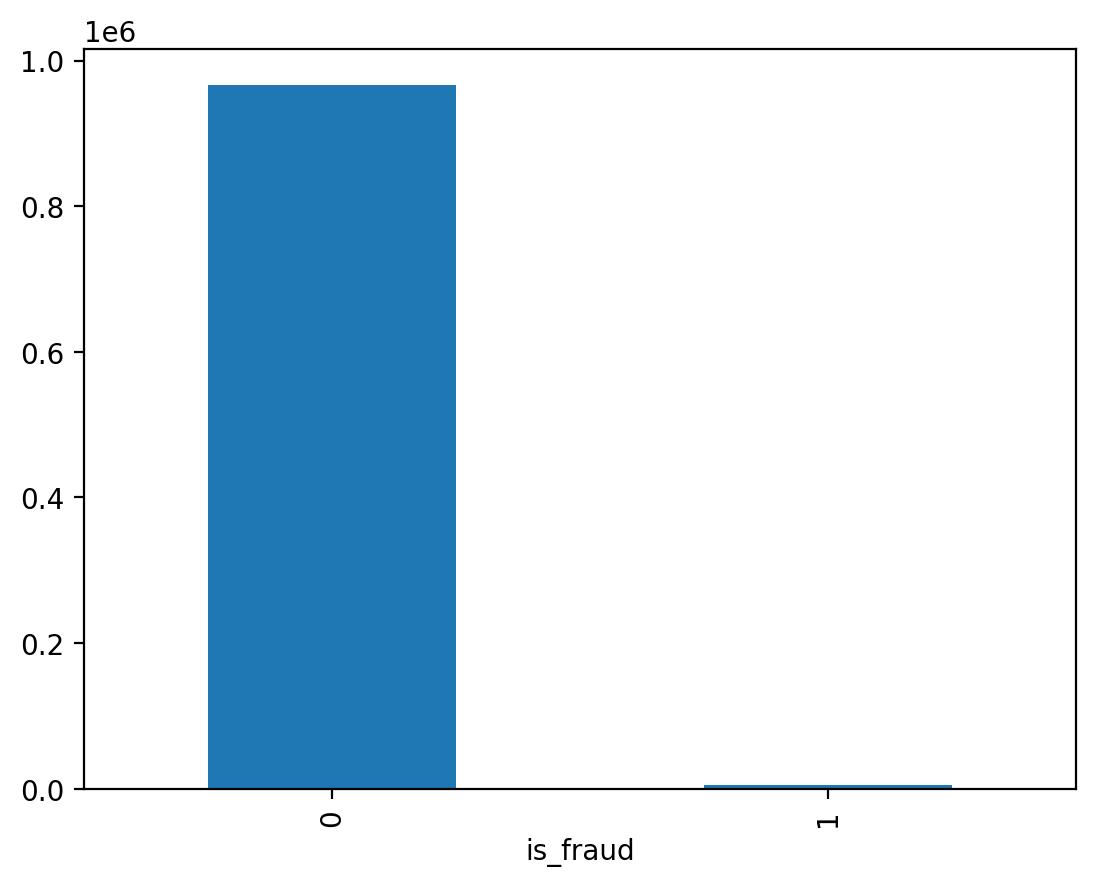

In [103]:
tad_1['is_fraud'].value_counts().plot(kind='bar')
plt.show()

## Modelo

In [104]:
from sklearn.linear_model import LogisticRegression

fraud_model = LogisticRegression()
fraud_model.fit( X_train[ varw ], y_train[ target ] )

LogisticRegression()

In [105]:
fraud_model.intercept_

array([-5.15677477])

In [106]:
fraud_model.coef_

array([[-1.03581232, -1.01865807, -0.96010887, -0.90628827,  0.00691768,
        -0.80917565, -0.57348455, -0.45377276, -0.28200209]])

In [108]:
pd.DataFrame( fraud_model.predict_proba( X_valid[ varw ] ) )

,0,1
0,0.9996,0.0004
1,0.9954,0.0046
2,0.9982,0.0018
3,0.9938,0.0062
4,0.9997,0.0003
...,...,...
324164,0.9993,0.0007
324165,0.9985,0.0015
324166,0.9994,0.0006
324167,0.9860,0.0140


In [109]:
pd.DataFrame( fraud_model.predict( X_valid[ varw ] ) ).value_counts()

0
0    324169
Name: count, dtype: int64

## Evaluación

In [112]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, roc_auc_score

y_true = y_valid[ target ]
y_scores = fraud_model.predict_proba( X_valid[varw] )[:,1]

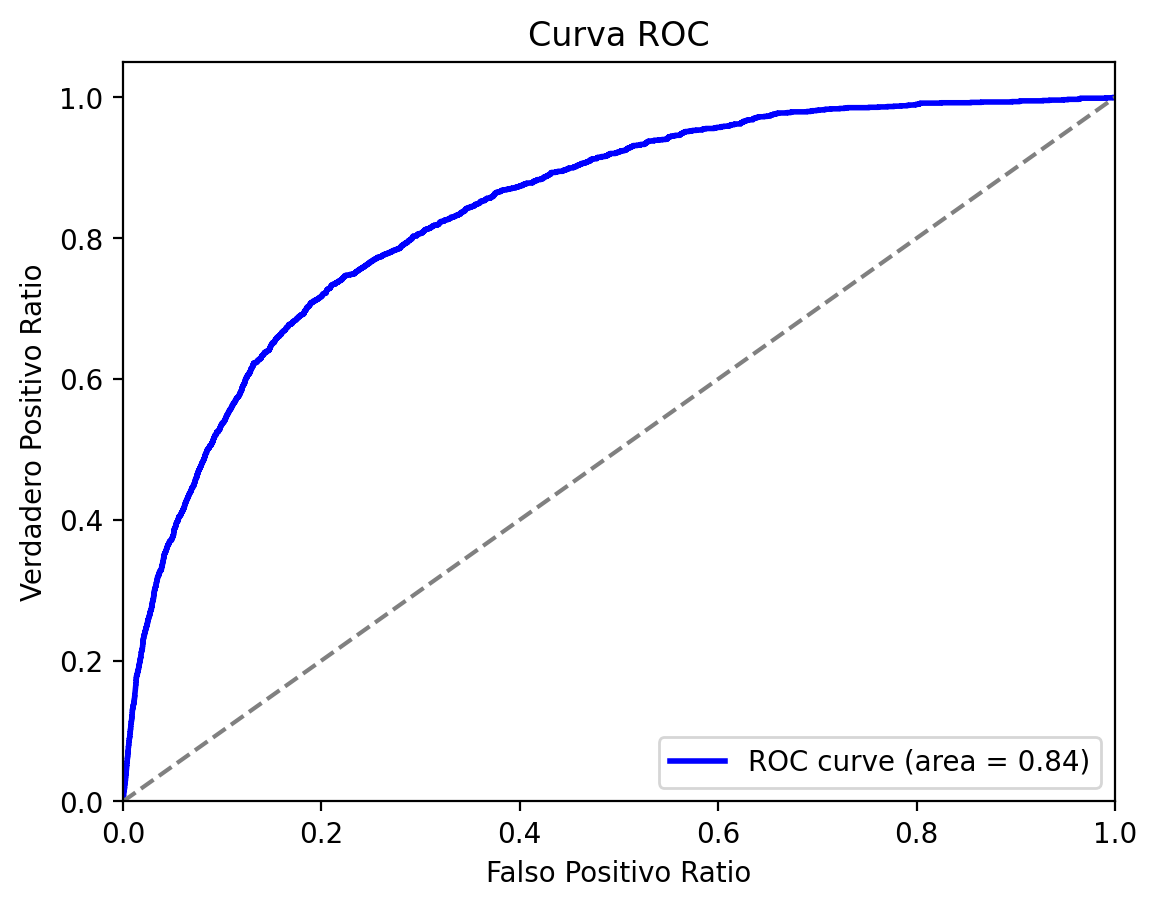

In [113]:
# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falso Positivo Ratio")
plt.ylabel("Verdadero Positivo Ratio")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

In [114]:
def metricas(model,Xv,yv):
    print(" Métricas para modelo de clasificación: \n")

    print(" Valor ROC : %.3f"   %roc_auc_score( y_score=model.predict_proba(Xv)[:,1] , y_true=yv  )   )

    print(" Valor ACC : %.3f\n" %accuracy_score( y_pred=model.predict(Xv) , y_true=yv) )

    print(" Matriz de confusión: ", "\n", confusion_matrix(y_pred=model.predict(Xv) , y_true=yv ) )

In [115]:
metricas(fraud_model , X_valid[varw], y_valid[target])

 Métricas para modelo de clasificación: 

 Valor ROC : 0.839
 Valor ACC : 0.994

 Matriz de confusión:  
 [[322310      0]
 [  1859      0]]


In [116]:
df.head()

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour_str,week_day,day,month,year,week_day_2,age,franja_hr,count,n_cc_num,n_merchant,n_category,n_first,n_last,n_gender,n_street,n_city,n_state,n_zip,n_job,n_trans_num,n_hour_str,n_day,n_week_day_2,n_franja_hr,d_amt_2,d_amt_3,d_amt_4,d_amt_5,d_lat_2,d_lat_3,d_lat_4,d_lat_5,d_long_2,d_long_3,d_long_4,d_long_5,d_city_pop_2,d_city_pop_3,d_city_pop_4,d_city_pop_5,d_unix_time_2,d_unix_time_3,d_unix_time_4,d_unix_time_5,d_merch_lat_2,d_merch_lat_3,d_merch_lat_4,d_merch_lat_5,d_merch_long_2,d_merch_long_3,d_merch_long_4,d_merch_long_5,d_week_day_2,d_week_day_3,d_week_day_4,d_week_day_5,d_age_2,d_age_3,d_age_4,d_age_5,d_count_2,d_count_3,d_count_4,d_count_5
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0,00,1,1,1,2019,M,30,madrugada,0,CAT_PEQUE,CAT_PEQUE,misc_net,CAT_PEQUE,CAT_PEQUE,F,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada,"(0.999, 47.52]","(0.999, 20.98]","(0.999, 9.65]","(0.999, 7.75]","(20.026, 39.354]","(20.026, 36.499]","(34.62, 39.354]","(33.906, 38.235]","(-87.477, -67.95]","(-82.136, -67.95]","(-87.477, -80.158]","(-84.148, -78.803]","(2456.0, 2906700.0]","(1178.0, 6841.0]","(2456.0, 20328.0]","(1631.0, 4680.0]","(1325376017.999, 1349249747.0]","(1325376017.999, 1342136943.667]","(1325376017.999, 1338750742.5]","(1325376017.999, 1336556658.8]","(19.026999999999997, 39.366]","(19.026999999999997, 36.599]","(34.734, 39.366]","(33.821, 38.056]","(-87.438, -66.951]","(-82.225, -66.951]","(-87.438, -80.237]","(-84.115, -78.824]","(-0.001, 3.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(12.999, 44.0]","(12.999, 35.0]","(12.999, 32.0]","(12.999, 30.0]","(-0.001, 777.0]","(-0.001, 475.0]","(-0.001, 356.0]","(-0.001, 284.0]"
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,00,1,1,1,2019,M,40,madrugada,0,CAT_PEQUE,CAT_PEQUE,grocery_pos,CAT_PEQUE,CAT_PEQUE,F,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada,"(47.52, 28948.9]","(70.54, 28948.9]","(83.14, 28948.9]","(94.68, 28948.9]","(39.354, 66.693]","(41.044, 66.693]","(41.94, 66.693]","(42.685, 66.693]","(-165.673, -87.477]","(-165.673, -93.828]","(-165.673, -96.798]","(-165.673, -98.739]","(22.999, 2456.0]","(22.999, 1178.0]","(22.999, 743.0]","(22.999, 566.0]","(1325376017.999, 1349249747.0]","(1325376017.999, 1342136943.667]","(1325376017.999, 1338750742.5]","(1325376017.999, 1336556658.8]","(39.366, 67.51]","(41.056, 67.51]","(41.957, 67.51]","(42.65, 67.51]","(-166.672, -87.438]","(-166.672, -93.805]","(-166.672, -96.897]","(-166.672, -98.84]","(-0.001, 3.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(12.999, 44.0]","(35.0, 51.0]","(32.0, 44.0]","(39.0, 47.0]","(-0.001, 777.0]","(-0.001, 475.0]","(-0.001, 356.0]","(-0.001, 284.0]"
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0,00,1,1,1,2019,M,57,madrugada,0,CAT_PEQUE,CAT_PEQUE,entertainment,CAT_PEQUE,CAT_PEQUE,M,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada,"(47.52, 28948.9]","(70.54, 28948.9]","(83.14, 28948.9]","(94.68, 28948.9]","(39.354, 66.693]","(41.044, 66.693]","(41.94, 66.693]","(40.497, 42.685]","(-165.673, -87.477]","(-165.673, -93.828]","(-165.673, -96.798]","(-165.673, -98.7

In [117]:
X_train.to_parquet("../data/output/X_train_fraud.parquet")
X_valid.to_parquet("../data/output/X_valid_fraud.parquet")
y_train.to_parquet("../data/output/y_train_fraud.parquet")
y_valid.to_parquet("../data/output/y_valid_fraud.parquet")

## Transformaciones a Scoring (tarjeta de puntos)

In [118]:
PDO = 40
base_score = 500
base_odds = 2

factor = PDO / np.log(2)

offset = base_score - factor * np.log( base_odds)

print(f"Factor: {factor}, Offset: {offset}")

betas = fraud_model.coef_[0].tolist()
beta0 = fraud_model.intercept_[0]

n = len(betas)

Factor: 57.70780163555854, Offset: 460.0


#### Creación de puntos

In [119]:
for v, beta in zip(varw, betas):

    print(f"Variable: {v}, con beta: {beta}")

    X_train[f'pts_{v}'] = np.ceil(  ( -X_train[v] * beta+beta0 / n  ) * factor + offset / n )
    X_valid[f'pts_{v}'] = np.ceil(  ( -X_valid[v] * beta+beta0 / n  ) * factor + offset / n )

Variable: w_n_franja_hr, con beta: -1.0358123175317362
Variable: w_n_category, con beta: -1.0186580663118472
Variable: w_d_count_5, con beta: -0.9601088661227342
Variable: w_d_age_5, con beta: -0.9062882654988873
Variable: w_d_unix_time_5, con beta: 0.00691767879525207
Variable: w_n_day, con beta: -0.8091756467277629
Variable: w_n_week_day_2, con beta: -0.5734845532659959
Variable: w_d_week_day_5, con beta: -0.4537727626380046
Variable: w_n_gender, con beta: -0.28200209303528845


In [120]:
varp = X_train.filter( like='pts' ).columns.tolist()
varp

['pts_w_n_franja_hr',
 'pts_w_n_category',
 'pts_w_d_count_5',
 'pts_w_d_age_5',
 'pts_w_d_unix_time_5',
 'pts_w_n_day',
 'pts_w_n_week_day_2',
 'pts_w_d_week_day_5',
 'pts_w_n_gender']

In [121]:
X_train['score'] = X_train[varp].sum(axis=1)
X_valid['score'] = X_valid[varp].sum(axis=1)

In [122]:
X_train

,index,n_franja_hr,n_category,d_count_5,d_age_5,d_unix_time_5,n_day,n_week_day_2,d_week_day_5,n_gender,is_fraud,w_n_franja_hr,w_n_category,w_d_count_5,w_d_age_5,w_d_unix_time_5,w_n_day,w_n_week_day_2,w_d_week_day_5,w_n_gender,pts_w_n_franja_hr,pts_w_n_category,pts_w_d_count_5,pts_w_d_age_5,pts_w_d_unix_time_5,pts_w_n_day,pts_w_n_week_day_2,pts_w_d_week_day_5,pts_w_n_gender,score
0,518810,madrugada,misc_net,"(284.0, 588.0]","(60.0, 95.0]","(1344732593.2, 1354217831.8]",12,L,"(-0.001, 1.0]",F,0,-0.5783,-0.9072,-0.1390,-0.2477,-0.0040,-0.3209,0.2231,0.1284,0.0993,-16.0000,-35.0000,11.0000,6.0000,19.0000,4.0000,26.0000,22.0000,20.0000,57.0000
1,144469,noche,home,"(-0.001, 284.0]","(39.0, 47.0]","(1325376017.999, 1336556658.8]",18,L,"(-0.001, 1.0]",F,0,-0.5995,1.3095,-0.6718,0.3194,-0.2835,0.0029,0.2231,0.1284,0.0993,-17.0000,96.0000,-19.0000,35.0000,19.0000,19.0000,26.0000,22.0000,20.0000,201.0000
2,549364,tarde,entertainment,"(588.0, 965.0]","(39.0, 47.0]","(1344732593.2, 1354217831.8]",23,V,"(2.0, 4.0]",M,0,1.5942,0.8126,0.2216,0.3194,-0.0040,0.0038,-0.2012,-0.1830,-0.1084,114.0000,66.0000,31.0000,35.0000,19.0000,19.0000,12.0000,14.0000,17.0000,327.0000
3,1121200,mañana,gas_transport,"(1476.0, 3122.0]","(30.0, 39.0]","(1362554134.2, 1371816817.0]",12,D,"(5.0, 6.0]",M,0,1.7052,0.2086,0.6796,0.3190,-0.0353,-0.3209,0.1693,0.1693,-0.1084,120.0000,31.0000,56.0000,35.0000,19.0000,4.0000,24.0000,23.0000,17.0000,329.0000
4,330481,tarde,shopping_pos,"(284.0, 588.0]","(30.0, 39.0]","(1336556658.8, 1344732593.2]",6,J,"(2.0, 4.0]",F,0,1.5942,-0.2005,-0.1390,0.3190,0.3191,0.3978,-0.1639,-0.1830,0.0993,114.0000,7.0000,11.0000,35.0000,18.0000,37.0000,13.0000,14.0000,20.0000,269.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972501,1241052,tarde,home,"(1476.0, 3122.0]","(60.0, 95.0]","(1362554134.2, 1371816817.0]",1,L,"(-0.001, 1.0]",M,0,1.5942,1.3095,0.6796,-0.2477,-0.0353,0.0338,0.2231,0.1284,-0.1084,114.0000,96.0000,56.0000,6.0000,19.0000,20.0000,26.0000,22.0000,17.0000,376.0000
972502,1066306,mañana,food_dining,"(965.0, 1476.0]","(47.0, 60.0]","(1362554134.2, 1371816817.0]",18,X,"(1.0, 2.0]",M,0,1.7052,1.2561,0.5229,-0.2146,-0.0353,0.0029,-0.1578,-0.1578,-0.1084,120.0000,92.0000,48.0000,7.0000,19.0000,19.0000,13.0000,14.0000,17.0000,349.0000
972503,28030,mañana,grocery_pos,"(-0.001, 284.0]","(39.0, 47.0]","(1325376017.999, 1336556658.8]",17,J,"(2.0, 4.0]",F,0,1.7052,-0.8964,-0.6718,0.3194,-0.2835,-0.1140,-0.1639,-0.1830,0.0993,120.0000,-34.0000,-19.0000,35.0000,19.0000,13.0000,13.0000,14.0000,20.0000,181.0000
972504,277869,noche,home,"(284.0, 588.0]","(47.0, 60.0]","(1336556658.8, 1344732593.2]",17,V,"(2.0, 4.0]",M,0,-0.5995,1.3095,-0.1390,-0.2146,0.3191,-0.1140,-0.2012,-0.1830,-0.1084,-17.0000,96.0000,11.0000,7.0000,18.0000,13.0000,12.0000,14.0000,17.0000,171.0000


#### Scorecard

In [123]:
lst = []

for vi, vp in zip( [v[2:] for v in varw] , varp):
    print(vi , " ----- " , vp)

    aux = X_train[[vi,vp]].drop_duplicates()
    aux = aux.sort_values( by = vi , ascending = True ).reset_index(drop=True)
    aux.columns = ['atributo','puntos']
    aux['característica'] = vi
    lst.append(aux)

n_franja_hr  -----  pts_w_n_franja_hr
n_category  -----  pts_w_n_category
d_count_5  -----  pts_w_d_count_5
d_age_5  -----  pts_w_d_age_5
d_unix_time_5  -----  pts_w_d_unix_time_5
n_day  -----  pts_w_n_day
n_week_day_2  -----  pts_w_n_week_day_2
d_week_day_5  -----  pts_w_d_week_day_5
n_gender  -----  pts_w_n_gender


In [124]:
scorecard = pd.concat(lst,ignore_index=True)
scorecard

,atributo,puntos,característica
0,madrugada,-16.0000,n_franja_hr
1,mañana,120.0000,n_franja_hr
2,noche,-17.0000,n_franja_hr
3,tarde,114.0000,n_franja_hr
4,entertainment,66.0000,n_category
...,...,...,...
72,"(2.0, 4.0]",14.0000,d_week_day_5
73,"(4.0, 5.0]",18.0000,d_week_day_5
74,"(5.0, 6.0]",23.0000,d_week_day_5
75,F,20.0000,n_gender


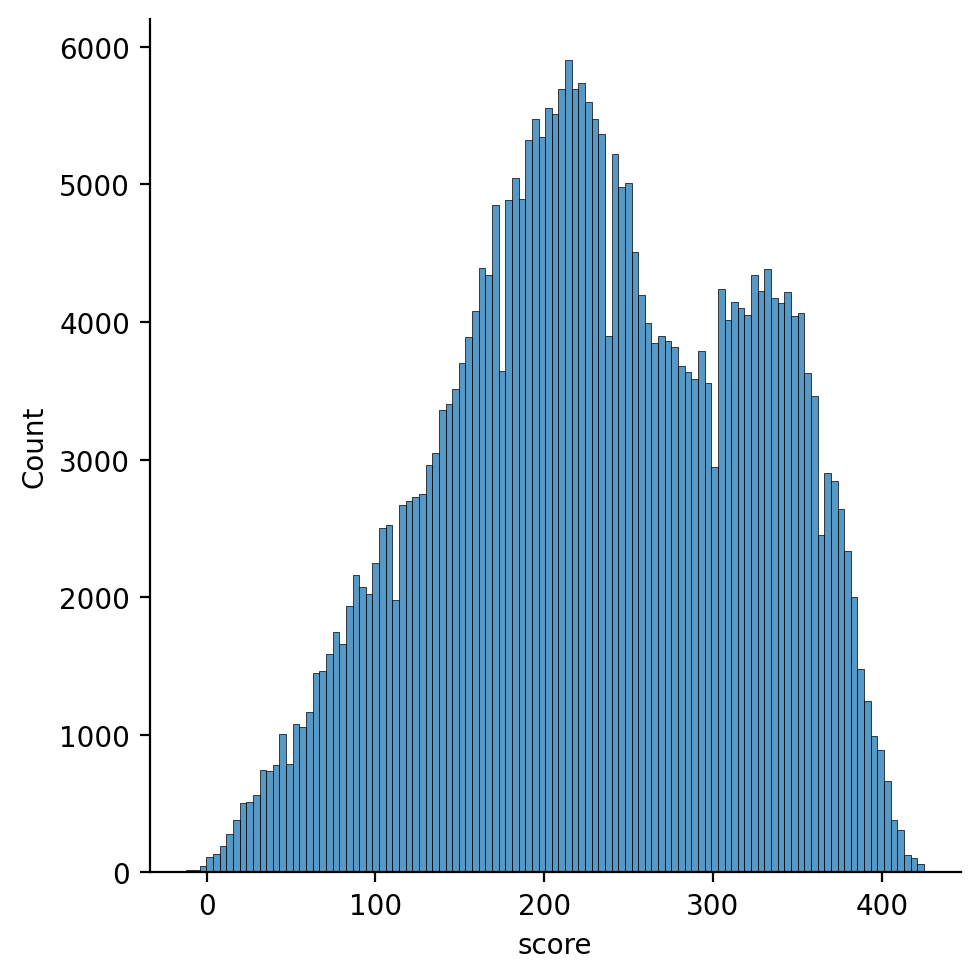

In [130]:
sns.displot(X_valid['score'])

In [132]:
pd.set_option("display.max_rows",200)
scorecard[['característica','atributo','puntos']].sort_values(['característica','atributo']).reset_index(drop=True)

,característica,atributo,puntos
0,d_age_5,"(12.999, 30.0]",17.0000
1,d_age_5,"(30.0, 39.0]",35.0000
2,d_age_5,"(39.0, 47.0]",35.0000
3,d_age_5,"(47.0, 60.0]",7.0000
4,d_age_5,"(60.0, 95.0]",6.0000
5,d_count_5,"(-0.001, 284.0]",-19.0000
6,d_count_5,"(1476.0, 3122.0]",56.0000
7,d_count_5,"(284.0, 588.0]",11.0000
8,d_count_5,"(588.0, 965.0]",31.0000
9,d_count_5,"(965.0, 1476.0]",48.0000
